## 7/5(수)

In [1]:
import re

In [11]:
re.findall('https?', 'http https ftp telnet ssh')

['http', 'https']

In [12]:
re.findall('http.?', 'http https ftp telnet ssh')  # 결과가 같은 이유 : .는 아무 글자나 한 글자 오면 되기 때문

['http ', 'https']

In [13]:
re.findall('ht{2}p.?', 'http https httpx ftp telnet ssh')

['http ', 'https', 'httpx']

In [14]:
re.findall('http', 'http https httpx ftp telnet ssh')

['http', 'http', 'http']

In [15]:
010-1234-1234

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-15-5e36bb79c29d>, line 1)

In [ ]:
re.match('[0-9]{3}.[0-9]{4}.[0-9]{4}', '02-1234-1234')   # 안됨.

In [ ]:
re.match('[0][1-9]{3}.[0-9]{4}.[0-9]{4}', '02-1234-1234')

In [ ]:
re.match('[0][1-9][0-9]?.[0-9]{4}.[0-9]{4}', '02-1234-1234')

In [ ]:
re.match('[0][1-9][0-9]?.[0-9]{4}.[0-9]{4}', '031-1234-1234')

In [ ]:
data = '010-1234-1234'
re.search('\d{3}-\d{4}-\d{4}', data)

In [ ]:
data = [
    '010-1234-1234',
    '031-1234-1234',
    '02-1234-1234',
    '00-0000-0000' # 얘는 오케이하면 안되는데 해버리는 문제
]

for _ in data:
    print(re.search('\d{2,3}(-\d{4}){2}', _))

In [ ]:
data = [
    '010-1234-1234',
    '031-1234-1234',
    '02-1234-1234',
    '00-0000-0000' # 문제해결
]

for _ in data:
    print(re.search('0[1-9]\d?(-\d{4}){2}', _))

In [ ]:
data = [
    '010-1234-1234',
    '031-1234-1234',
    '02-1234-1234',
    '00-0000-0000', 
    '01012341234',
    '010/1234/1234'
]

for _ in data:
    print(re.search('0[1-9]\d?(.?\d{4}){2}', _))

In [ ]:
data = [
    '010-1234-1234',
    '031-1234-1234',
    '02-1234-1234',
    '00-0000-0000', 
    '01012341234',
    '010/1234/1234',
    '+82 010-1234-1234',
    '8201012341234',
    '82 01012341234',
    '공1공-1234-1234'
]

for _ in data:
    print(re.search('([+]?[1-9][0-9]?.?)?[0공영일이][1-9][\d공영일이]?(.?\d{4}){2}', _))

In [ ]:
result = re.match('([+]?[1-9][0-9]?.?)?0[1-9]\d?(.?\d{4}){2}', data[0])

In [ ]:
result.span(), result.start(), result.end()

In [ ]:
result.group(0), result.group(1), result.group(2), result.groups()

In [ ]:
re.search('s.+o','stackoverflow')  # greedy

In [ ]:
re.search('(s.+?o)', 'stackoverflow ')  # lazy

In [ ]:
re.search('((?:^stack|over|adfk)|flow$)', 'stackoverflow')  # 이해 아직

In [ ]:
re.search('over', 'stackoverflow')

In [ ]:
re.match('over', 'stackoverflow')

In [ ]:
re

In [ ]:
data = '''
    개똥이 021131-3123415
    말복이 040512-4513589
    
'''

mask = '*******'

for line in data.splitlines():
    if(len(line.split()) > 1):
        s1 = line.split()    # 개똥이 | 숫자
        s2 = s1[-1].split('-')  # 앞부분 - 뒷부분
        
        print('{} {}-{}'.format(s1[0], s2[0], mask))

In [ ]:
print(re.sub('\d{7}', mask, data))

In [ ]:
re.search('((?:ABC)+)', 'ABCABCABC OK').groups()

In [ ]:
re.search(r'\bclass\b', 'a class sdf')

In [ ]:
re.search(r'\bclass\b', 'a subclass sdf')

In [ ]:
re.search(r'\bclass\b', 'a subclassified sdf')

In [ ]:
re.search(r'\Bclass\B', 'a subclassified sdf')

In [ ]:
# \g<그룹번호>
p = re.compile(r'(\d{6}).(\d{7})')
p.search(data).groups()

In [ ]:
p = re.compile(r'(\d{6}).(\d{7})')
p.sub('\g<1> \g<2>', data)
print(re.sub('\d{7}', mask, data))

In [ ]:
print(p.sub('\g<1> '+'*'*len(p.search(data).group(2)), data))  # 억지스러운 표현. 비추천

In [ ]:
data = [
    'http://www.example.com'
]

urlPattern = re.compile(r'http://www.example.com')

for _ in data:
    print(urlPattern.search(_))

In [ ]:
data = [
    'http://www.example.com',
    'http://mail.gmail.com'
    
#    ------- 
#                    ------- com net org gov edu ...
            
]

urlPattern = re.compile(r'https?://[a-z]+.(\w+.(?:[a-z]+)$)')

for _ in data:
    print(urlPattern.search(_))

In [16]:
data = [
    'http://www.example.com',
    'http://mail.gmail.com',
    'https://mail.gmail.com',
    'https://www.example.co.kr'
    
#    ------- 
#                    ------- com net org gov edu ...
#                            co.kr .kr .jp .eu .cn
]

urlPattern = re.compile(r'https?://([a-z]+).(\w+.(?:[a-z]+))$)')

for _ in data:
    rst = urlPattern.search(_)
    print(rst)
    print(rst.groups())

error: unbalanced parenthesis at position 35

In [ ]:
data = [
    'http://www.example.com',
    'http://mail.gmail.com',
    'https://mail.gmail.com',
    'https://www.example.co.kr',
    'https://'
    
#    ------- 
#                    ------- com net org gov edu ...
#                            co.kr .kr .jp .eu .cn
]

urlPattern = re.compile(r'(?:https?|ssh|ftp)://([a-z]+).(\w+.(?:[.](?:[a-z]+))+)(?:/(.+))?')
# (?:/(.+))? : / 뒤에 아무 글자나 한 문자 이상, 그룹으로 묶으면서 있어도 되고 없어도 된다.
for _ in data:
    rst = urlPattern.search(_)
    print(rst)
    print(rst.groups())

In [ ]:
data = [
    'korea@korea.com',
    'korea@korea.co.kr',
    'korea@korea.ac.kr',
    'korea-123@korea.com',
    '1_asdf@korea.com',
    '가나다123@korea.com'
    
]  # 아이디 / 도메인

#.+@{korea}[.].+?[.].+?

In [ ]:
r'(.+)@(\w+(.\w+)+)'  # 영문자가 나와야하므로 \w 쓰는 것이 필수(python에서는 \w도 한글 인식 가능)

In [ ]:
# 정답
r'([a-z0-9-_.]+)@((?:.?[a-z]+)+)', re.IGNORECASE
# 규칙 : 영문소문자, 숫자, -, _, . 사용가능하도록

In [ ]:
#한글까지 넣을 수 있도록 추가
r'([a-z가-힣0-9-_.]+)@((?:.?[a-z]+)+)', re.IGNORECASE

In [ ]:
[\w.]+@[\w.]+{2}  # 이렇게 작성하면 .a.b.c.d.e에서 .a를 두 글자로 인식.
((?:.?[a-z]{2} #로 작성하면 글자만 두 글자 찾기 가능. 목적에 따라 간단한 코드보다 조금 복잡한 코드를 고르는 것이 필요하다

## 07/06(목)

In [ ]:
urlparse('https://www.google.com/search?q=ㅇ어쩌고')

In [ ]:
urlunparse(
    urlparse(
        'https://www.google.com/search?q=ㅇ어쩌고')[:2]+('','','',''))

In [ ]:
urljoin('https://www.google.comm/search?q=ㅇ어쩌고', '/robots.txt')

---------------------------

In [2]:
from urllib.robotparser import RobotFileParser
from requests import request, get, post
from requests.compat import urljoin, urlparse, urlunparse, quote, unquote

from requests.exceptions import HTTPError
from time import sleep
from random import randint

In [3]:
def canFetch(ua, path):  # url , 특정 path에 대한 권한이 있는지
    rp = RobotFileParser(urljoin(path, '/robots.txt'))
    rp.read()
    return rp.can_fetch(ua, urlparse(path).path)

#### can_fetch(useragent, url)

:구문 분석된 robots.txt 파일에 포함된 규칙에 따라, useragent가 url를 가져올 수 있으면 True를 반환합니다.

In [ ]:
canFetch('*', 'https://www.google.com/search')

In [ ]:
canFetch('Yeti', 'https://news.naver.com/main/imagemontage')

**네이버 robots.txt** 

User-agent : Yeti

Allow : /main/imagemontage

Disallow : /

User-agent : *

Disallow : /

---------------

GET -> url

POST -> data

##### download

In [6]:
def download(url, method='GET', params={}, data={}, 
             headers={}, max_count=3):  # 시간이 없는 관계로 max count 설정
    #if canFetch(headers['user-agent']
     #           if 'user-agent' in headers.keys() else '*',
      #          url) == False:
        #print('[오류] 수집 X')  # 그러니 이렇게 알고만 있도록 하자
#        return False 이렇게 작성하면 실제 갈 수 있는 사이트가 많지 않다.
    resp = request(method, url, params = params, data = data, headers = headers)
    
    try:
        resp.raise_for_status()
    except HTTPError as e:  # error 잡아내기
        if 500 <= e.response.status_code < 600:  # 500번~600번대 : 내 실수 아니므로 기회를 더 주자
            if max_count > 0:
                sleep(randint(1,10))   # 딜레이 주는 함수
                resp = download(url, method, params, data, headers, max_count-1)
            else:
                resp = False
                print('재시도 횟수 초과')
        else:
            resp = False
            print(e.response.status_code)
            print(e.response.reason)
            print(e.request.headers)
    
    
   # if resp.status_code == 200 :
    #    print('수집완료')
        
    return resp

In [ ]:
download('http://www.google.com/search?q=한지민')

In [ ]:
download('https://httpbin.org/status/404')

In [ ]:
download('https://httpbin.org/status/500')  # randint import 안 했어서 문제

In [6]:
resp = download('https://www.google.com/search',
               params={'q':'한지민'})
resp.request.url

'https://www.google.com/search?q=%ED%95%9C%EC%A7%80%EB%AF%BC'

In [7]:
resp.headers

{'Content-Type': 'text/html; charset=ISO-8859-1', 'Date': 'Thu, 07 Jul 2022 01:08:35 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2022-07-07-01; expires=Sat, 06-Aug-2022 01:08:35 GMT; path=/; domain=.google.com; Secure, AEC=AakniGNBp09XKbQCcyA3OPMvh-kXidUE0jjvGLlK-MynnV05tSfqP3E4N6U; expires=Tue, 03-Jan-2023 01:08:35 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=tiV5jdBuY2csZHndZfFvq5Vslb5xmBCU_XPEXLYyl_imTv5lGkalAoTOzE9gah2VSLpVC3xjbDbEMFucOpQPkWbCpkeJefXB3Fn2nJMhGUK0Smh6iuCkw7pA9jyYEdA3-k-u5NbUIDFObTpJNq5W_kTOXiT2x6Gy8BsdifosxwI; expires=Fri, 06-Jan-2023 01:08:35 GMT; path=/; domain=.google.com; HttpOnly', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000,h3-Q050=":443"; ma=2592000,h3-Q046=":443"; ma=2592000,h3-Q043=":443"; ma=2592000,qu

In [8]:
type(resp.content), type(resp.text), resp.encoding

(bytes, str, 'ISO-8859-1')

In [9]:
resp.encoding = 'utf8'

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>&#54620;&#51648;&#48124; - Google &#44160;&#49353;</title><script nonce="cTxmUyAL1eSLX1lUAE0qXA">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}windo
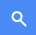
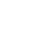
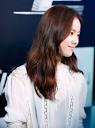
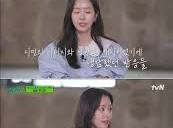
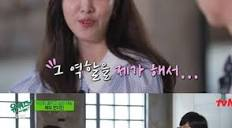
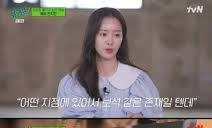
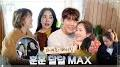

In [10]:

resp.text  # 제대로 안 뜨는 문자 있을 수 있음

'<!doctype html><html lang="ko"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>한지민 - Google 검색</title><script nonce="cTxmUyAL1eSLX1lUAE0qXA">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var h=fu
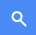
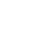
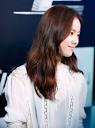
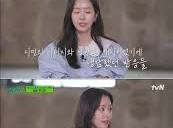
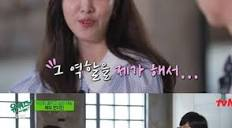
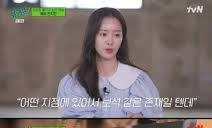
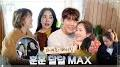

In [11]:
from html import unescape
unescape(resp.text)

In [12]:
resp = download('https://www.google.com/search',
               params = {'q':'한지민'},
               headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
               )

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>한지민 - Google 검색</title><script nonce="RclxSTfXoqvDAYQuHbvjEg">(function(){\nvar b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:\'FjLGYu3AJ_CaseMPx6qdoA8\',kEXPI:\'31\',kBL:\'ODV8\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}\nfunction n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshid=")&&"slh"!==a&&(d
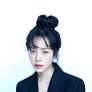
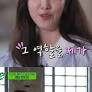
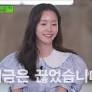
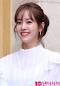
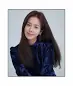
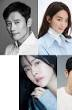
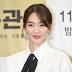
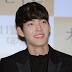
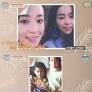
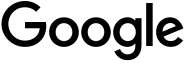

In [13]:
resp.text

In [14]:
import re

In [ ]:
re.findall(r'<h3 class="LC20lb .+">(.+)</h3>', resp.text )

In [ ]:
re.findall(r'<h3 class="LC20lb .+?">(.+?)</h3>', 
           resp.text )

In [ ]:
re.findall(r'<h3 class="LC20lb [^"]+?">([^<]+?)</h3>', 
           resp.text )

In [ ]:
# <h3 class="LC20lb MBeuO DKV0Md">한지민 - 나무위키</h3>

# 한지민보다 더 예쁘다는 친언니…인기 많았다 - 한국경제

re.search(r'<h3 class="LC20lb .+">(.+)</h3>', resp.text )

In [ ]:
len(re.findall(r'<a', resp.text))

In [ ]:
len(re.findall(r'LC20lb', resp.text))

In [ ]:
len(re.findall(r'<a href="[^"]+?"', resp.text))  # 너무 많으니 범위 줄이자

In [ ]:
len(re.findall(r'<div class="yuRUbf"><a href="[^"]+?"', resp.text))

In [ ]:
re.findall(r'<div class="yuRUbf"><a href="[^"]+?"', resp.text)

##### headers

In [11]:
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
resp = download(url='https://search.naver.com/search.naver',
               params = {'where' : 'nexearch', 'query' : '한지민'},
               headers = headers )

In [51]:
re.findall(r'<div class="total_tit"> <a .+? href="[^"]+?"', resp.text)

['<div class="total_tit"> <a target="_blank" href="https://namu.wiki/w/%ED%95%9C%EC%A7%80%EB%AF%BC"',
 '<div class="total_tit"> <a target="_blank" href="https://www.instagram.com/jimin0808/"',
 '<div class="total_tit"> <a target="_blank" href="https://www.instagram.com/gksjimin/"',
 '<div class="total_tit"> <a target="_blank" href="https://gall.dcinside.com/board/lists/?id=hjimin"']

In [52]:
re.findall(r'<div class="total_tit"> <a .+?>(.+?)</a>', resp.text)

[' <mark>한지민</mark> - 나무위키 ',
 ' <mark>한지민</mark>프로(@jimin0808) • Instagram 사진 및 동영상 ',
 ' <mark>한 지민</mark>(@gksjimin) • Instagram 사진 및 동영상 ',
 ' <mark>한지민</mark> 갤러리 - 커뮤니티 포털 디시인사이드 ']

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="한지민 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'한지민\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'한지민\'의 네이버 통합검색 결과입니다."> <title>한지민 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220630.css"> <link rel="stylesheet" type="text/css" href
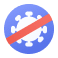
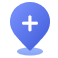
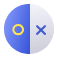
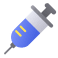

In [53]:
resp.text

### DOM (트리)
DOM의 계층적인 구조의 특성을 이용해 BeautifulSoup을 사용함으로써 편하게 크롤링, 크래핑 할 수 있음

lxml을 이용하면 parsing을 할 때 속도가 상당히 빠르다.

XML의 규칙 : 중첩 x, 항상 큰 따옴표(quote)로 attribute 감싸기, 항상 closing part가 있어야 함.

In [ ]:
# !pip install beautifulsoup4

In [15]:
from bs4 import BeautifulSoup

In [16]:
# 어려운 방법
html = '''
    <!doctype html>
    <html>
        <head></head>
        <body>
            <a href="주소1">
                <a class=""   href='주소2'></a>
                    <a class="" href=주소3>
                        <div width=800>
                            <p>
                                <img src=주소4>
                </a>
                    </div>
        </BODY>
    </html>

    <body></body>
'''

    

       DOM
       HTML
    HEAD    BODY
             A
           A   A
              DIV
               P
              IMG
              
dom.find() -> 모든 자식 요소 중에 name(태그 이름)이 ?인 것 1개

In [19]:
re.findall(r'href=(?:\'|\")(.+)(?:\'|\")', html)

['주소1', '주소2']

In [20]:
dom = BeautifulSoup(html, 'html.parser')

In [21]:
dom  # 없는 것들 알아서 추가해줌


<!DOCTYPE html>

<html>
<head></head>
<body>
<a href="주소1">
<a class="" href="주소2"></a>
<a class="" href="주소3">
<div width="800">
<p>
<img src="주소4"/>
</p></div></a>

</a></body>
</html>
<body></body>

In [22]:
BeautifulSoup(html, 'lxml')

<!DOCTYPE html>
<html>
<head></head>
<body>
<a href="주소1">
</a><a class="" href="주소2"></a>
<a class="" href="주소3">
<div width="800">
<p>
<img src="주소4"/>
</p></div>
</a></body>
</html>

In [23]:
#!pip install html5lib

In [17]:
import html5lib

In [25]:
BeautifulSoup(html, 'html5lib')

<!DOCTYPE html>
<html><head></head>
        <body>
            <a href="주소1">
                </a><a class="" href="주소2"></a>
                    <a class="" href="주소3">
                        </a><div width="800"><a class="" href="주소3">
                            </a><p><a class="" href="주소3">
                                <img src="주소4"/>
                </a>
                    </p></div>
        
    

    
</body></html>

In [26]:
dom = BeautifulSoup(html, 'html.parser')  # tree 형태

In [27]:
dom.a.attrs['href']

'주소1'

In [28]:
dom.a

<a href="주소1">
<a class="" href="주소2"></a>
<a class="" href="주소3">
<div width="800">
<p>
<img src="주소4"/>
</p></div></a>

</a>

In [29]:
dom.find('a')

<a href="주소1">
<a class="" href="주소2"></a>
<a class="" href="주소3">
<div width="800">
<p>
<img src="주소4"/>
</p></div></a>

</a>

In [30]:
dom.find('a') == dom.a

True

In [31]:
dom.find(attrs={'href':'주소1'})

<a href="주소1">
<a class="" href="주소2"></a>
<a class="" href="주소3">
<div width="800">
<p>
<img src="주소4"/>
</p></div></a>

</a>

In [32]:
dom.find(attrs={'href':'주소1'}) == dom.a

True

In [33]:
dom.find(attrs={'href':'주소1'}, recursive=False) == dom.a

False

In [34]:
dom.body.find('a', recursive=False) == dom.a

True

In [35]:
dom.body.find('a', recursive=True) == dom.a

# dom.a => DOM(Root노드)의 모든 자손 요소 중 첫 번째 A라는 이름을 갖는 노드

True

In [36]:
dom.find(attrs={'href' : '주소2'}) == dom.a.find('a', recursive=False)

True

In [37]:
dom.find(text=re.compile(r'내용\d'))

In [38]:
dom.find(text=re.compile(r'내용\d')).find_parent()

AttributeError: 'NoneType' object has no attribute 'find_parent'

In [39]:
for _ in dom.find_all(text=re.compile(r'내용\d')):
        print(_.find.parent())

In [40]:
dom.find_all(limit=1) = dom.find()

SyntaxError: cannot assign to function call (<ipython-input-40-b04a707bd6ee>, line 1)

In [41]:
dom.a == dom.find('a') == dom.find_all('a', limit=1)[0]

True

In [42]:
for _ in dom.find_all('a'):
    if _.has_attr('href'):
        print(_.attrs['href'])

주소1
주소2
주소3


In [43]:
for _ in dom.find_all():
    print(_.name)

html
head
body
a
a
a
div
p
img
body


In [44]:
if dom.a.has_attr('href'):
    dom.a.attrs['href']

In [54]:
resp = download('https://www.google.com/search', params={'q':'한지민'},
        headers=headers)

[오류] 수집 X


In [55]:
dom = BeautifulSoup(resp.text, 'html.parser')

In [56]:
len([_ for _ in dom.find_all('a') if _.has_attr('href')])

96

In [57]:
for _ in dom.find_all('h3'):  # 왜 됐는지 모르겠음
    parent = _.find_parent('a')
    if parent != None and parent.has_attr('href'):
        print(parent.attrs['href'])
        print(_.text)

https://namu.wiki/w/%ED%95%9C%EC%A7%80%EB%AF%BC
한지민 - 나무위키:대문
https://ko.wikipedia.org/wiki/%ED%95%9C%EC%A7%80%EB%AF%BC
한지민 - 위키백과, 우리 모두의 백과사전
https://www.hankyung.com/entertainment/article/202205300591H
한지민보다 더 예쁘다는 친언니…인기 많았다 - 한국경제
https://movie.daum.net/person/main?personId=84581
한지민 | 다음영화
https://ko-kr.facebook.com/official.hjm
한지민 - Facebook
https://www.instagram.com/explore/tags/%ED%95%9C%EC%A7%80%EB%AF%BC/
#한지민 hashtag on Instagram • Photos and Videos
https://www.youtube.com/hashtag/%ED%95%9C%EC%A7%80%EB%AF%BC
한지민
https://www.nocutnews.co.kr/news/5767549
[인터뷰]'한지민 쌍둥이 언니'役 정은혜 "꿈은 다 이뤘어요"


In [58]:
dom = BeautifulSoup(resp.text, 'lxml')

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>한지민 - Google 검색</title><script nonce="4gZNCI_aFZ9YE3KRZtO3Yg">(function(){
var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:'iznFYr6GIs6z2roPr4mvmAc',kEXPI:'31',kBL:'JH2P'};google.sn='web';google.kHL='ko';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshid=")&&"slh"!==a&&(d="&cshid="
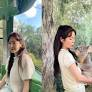
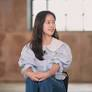
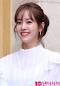
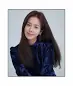
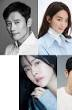
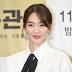
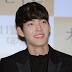
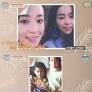
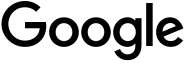

In [59]:
dom

In [ ]:
dom.select('yuRUbf > a')

In [ ]:
for _ in dom.select('yuRUbf > a'):
    print(_.attrs['href'])
    print(_.select_one('h3').text)

find / find_all (자식/자손)

find_parent / find_parents (부모/조상)

find_prev_sibling / find_prev_siblings (내 앞의 형제들)

find_next_sibling / find_next_siblings (내 다음 형제들)

In [ ]:
dom

In [ ]:
# NAVER 예시
resp = download(url='https://search.naver.com/search.naver',
               params = {'where' : 'nexearch', 'query' : '한지민'},
               headers = headers )
dom = BeautifulSoup(resp.content, 'html.parser')

In [ ]:
for _ in dom.find_all(attrs={'class': 'news_tit'}):
    print(_.attrs['title'])

In [ ]:
_.text, _.contents, [c for c in _.children]  # 자식 노드랑 매칭

In [24]:
url = 'https://pythonscraping.com/pages/page3.html'
dom = BeautifulSoup(download(url).content, 'html.parser')


In [25]:
dom.div.find_all(recursive=False)[2].find().name

'p'

In [26]:
[_.name for _ in dom.div.find_all(recursive=False)]

['img', 'h1', 'div', 'table', 'div']

In [27]:
base = dom.p

In [28]:
base.find_parent().find_previous_siblings(limit=2)[-1].attrs['src']
# p       부모             왼쪽 형제 2번의                이름

'../img/gifts/logo.jpg'

In [29]:
dom.find_all('img')

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <img src="../img/gifts/img1.jpg"/>,
 <img src="../img/gifts/img2.jpg"/>,
 <img src="../img/gifts/img3.jpg"/>,
 <img src="../img/gifts/img4.jpg"/>,
 <img src="../img/gifts/img6.jpg"/>]

In [30]:
for _ in [_.attrs['src'] for _ in dom.find_all('img')]:
    img = download(urljoin(url, _))
    if img.status_code == 200 and img.headers['Content-Type'].split('/')[0] == 'image': # 이미지이면
        with open(_.split('/')[-1],'wb') as fp:
            fp.write(img.content)  # 저장

In [31]:
resp = download(urljoin(url, base.find_parent().\
                 find_previous_siblings(limit=2)[-1].attrs['src']))

In [32]:
resp.headers['Content-Type'].split('/')[1]  # 확장자명 확인하는 방법

'jpeg'

In [33]:
from os import listdir

In [34]:
[_ for _ in listdir() if _.split('.')[-1] == 'jpg']  # 이미지 파일 조회하기

['file.jpg',
 'img1.jpg',
 'img2.jpg',
 'img3.jpg',
 'img4.jpg',
 'img6.jpg',
 'leonardo.jpg',
 'logo.jpg']

In [35]:
resp.headers

{'Server': 'nginx', 'Date': 'Thu, 07 Jul 2022 01:09:36 GMT', 'Content-Type': 'image/jpeg', 'Content-Length': '43904', 'Last-Modified': 'Mon, 04 Aug 2014 00:49:04 GMT', 'Connection': 'keep-alive', 'ETag': '"53ded880-ab80"', 'X-Powered-By': 'PleskLin', 'Accept-Ranges': 'bytes'}

In [36]:
with open('file.jpg', 'wb') as fp:
    fp.write(resp.content)

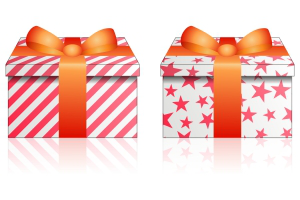

In [37]:
from PIL import Image
Image.open('file.jpg')

In [38]:
dom.table

<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>
<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gift

In [39]:
type(dom.contents[0])

bs4.element.Tag

           table
     tr             tr.gift             tr.gift
th  th   th       td   td   td ...        
                          ()TEXT()

In [40]:
html = download(url)
re.findall(r'(\$.+?[.]\d+)',html.text)

['$5.00', '$15.00', '$10,000.52', '$10,005.00', '$0.50', '$1.50']

In [41]:
for _ in base.find_parent().find_next_sibling().\
find_all('tr', attrs={'class':'gift'}, recursive=False):
    print(_.find_all(reversed=False)[2].text.strip())

Now with super-colorful bell peppers!
8 entire dolls per set! Octuple the presents!
Also hand-painted by trained monkeys!
Or maybe he's only resting?
Keep your friends guessing!


In [42]:
for _ in base.find_parent().find_next_sibling().\
find_all('tr', attrs={'class':'gift'}, recursive=False):
    print(_.find_all(reversed=False)[3].text.strip())

$15.00
$10,000.52
$10,005.00
$0.50
$1.50


In [43]:
# BeautifulSoup(parser => html5lib으로 바꿔서)
dom = BeautifulSoup(html.text, 'html5lib')


In [44]:
[_.name for _ in dom.div.find_all(recursive=False)]

['img', 'h1', 'div', 'table', 'p', 'div']

굵은 글씨 찾아보기

In [45]:
base = dom.div.find_all(recursive=False)[-1]

In [46]:
dom.find_all(attrs={'class':'excitingNote'})

[<span class="excitingNote">Now with super-colorful bell peppers!</span>,
 <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>,
 <span class="excitingNote">Also hand-painted by trained monkeys!</span>,
 <span class="excitingNote">Or maybe he's only resting?</span>,
 <span class="excitingNote">Keep your friends guessing!</span>]

In [47]:
base = dom.find(attrs={'id':'footer'})  # find_all로 하면 안됨.

In [48]:
dom.find_all(attrs={'class':'excitingNote'})  # 같은 결과

[<span class="excitingNote">Now with super-colorful bell peppers!</span>,
 <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>,
 <span class="excitingNote">Also hand-painted by trained monkeys!</span>,
 <span class="excitingNote">Or maybe he's only resting?</span>,
 <span class="excitingNote">Keep your friends guessing!</span>]

In [49]:
for tr in [_ for _ in base.find_previous_siblings(limit=2)[-1]\
.find_all(attrs={'class':'gift'})]:
    if tr.find('span') != None:
        print(tr.find('span').text.strip())  
        
# ResultSet Error : 복수 개의 값이 반환되었다. 단수가 반환되어야 함.

Now with super-colorful bell peppers!
8 entire dolls per set! Octuple the presents!
Also hand-painted by trained monkeys!
Or maybe he's only resting?
Keep your friends guessing!


### CSSOM

In [50]:
dom.select_one('div + table')

<table id="giftList">
<tbody><tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>

<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>

<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>

<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src=".

In [51]:
dom.select_one('div + table') == dom.select_one('#giftList')

True

In [52]:
dom.select('div + table tr > td:nth-of-type(1)')

[<td>
 Vegetable Basket
 </td>,
 <td>
 Russian Nesting Dolls
 </td>,
 <td>
 Fish Painting
 </td>,
 <td>
 Dead Parrot
 </td>,
 <td>
 Mystery Box
 </td>]

In [53]:
dom.select('div + table tr > td:nth-of-type(2)')

[<td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td>,
 <td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td>,
 <td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td>,
 <td>
 This is an ex-parrot! <span class="excitingNote">Or maybe he's only resting?</span>
 </td>,
 <td>
 If you love suprises, this mystery box is for you! Do not place on light-colored surfaces. May cause oil staining. <span class="excitingNote">Keep your friends guessing!</span>
 </td>]

In [54]:
dom.select('div + table tr > td:nth-of-type(3)')

[<td>
 $15.00
 </td>,
 <td>
 $10,000.52
 </td>,
 <td>
 $10,005.00
 </td>,
 <td>
 $0.50
 </td>,
 <td>
 $1.50
 </td>]

In [55]:
type(dom.select_one('div + table tr > td:nth-of-type(3)'))

bs4.element.Tag

In [56]:
[_.text.strip() for _ in 
dom.select('div + table tr > td:nth-of-type(3)')]  # Tag 형식이므로 리스트 형식으로 내보낼 수 있음

['$15.00', '$10,000.52', '$10,005.00', '$0.50', '$1.50']

In [57]:
[_.attrs['src'] for _ in 
dom.select('div + table tr > td:nth-of-type(4) > img')]  # image tag의 src : 이미지 속성의 url

['../img/gifts/img1.jpg',
 '../img/gifts/img2.jpg',
 '../img/gifts/img3.jpg',
 '../img/gifts/img4.jpg',
 '../img/gifts/img6.jpg']

In [58]:
# <h3 class="LC20lb MBeuO DKV0Md">


In [87]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C%EC%A7%80%EB%AF%BC'

In [60]:
import html

In [61]:
dom = BeautifulSoup(resp.content, 'html.parser')

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [62]:
for _ in dom.select('.total_info + a'):
    print(_.attrs['href'])
    print(_.text.strip())

In [63]:
# 다른 사람 코드
res = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C%EC%A7%80%EB%AF%BC')
soup = BeautifulSoup(res.content, 'html.parser')
aall = soup.select('div.total_area > a')
for i in aall:
    print(i['href'])

NameError: name 'requests' is not defined

다음에서도 한지민의 뉴스 정보를 끌어와보기!

In [86]:
resp = download('https://search.daum.net/search',
               params = {'q':'한지민'},
               headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
               )
dom = BeautifulSoup(resp.content, 'html.parser')

In [65]:
for _ in dom.select('#container a.tit_main'):
    print(_.attrs['href'])
    print(_.text.strip())

http://v.media.daum.net/v/20220706224723962?f=o
한지민 외모 망언 "웃을 때 주름이.."(유퀴즈)
http://v.media.daum.net/v/20220707091817393?f=o
한지민 "정은혜에게 편견 있었지만.." '유퀴즈'
http://v.media.daum.net/v/20220707095118602?f=o
한지민 "'미쓰백' 하며 담배 종류별로 다 펴봐..지금은 끊었다"
http://v.media.daum.net/v/20220707090936089?f=o
한지민 "설거지 할 때도 담배 물어, 지금은 끊었다"→'유퀴즈' 상금, 정은혜에 선물 [종합]


### Crawling

In [66]:
queue = list()

In [67]:
queue.append(1)

In [68]:
queue.pop(0)

1

In [69]:
stack = list()

In [70]:
stack.append(1)

In [71]:
stack.pop(-1)   # 왜 반대로 빼야 하지?

1

NoneType Error가 났을 때는 attrs를 attr로 바꾸자

In [4]:
# 그림, 문자, 영상, 링크 등 다양한 객체 가져올 것
queue = list()
seen = list()

queue.append('https://www.google.com/search?q=%ED%95%9C%EC%A7%80%EB%AF%BC&hl=ko&sxsrf=ALiCzsZEo5H5qPxbEHS_HXh5gzqMPhxLSw%3A1657094158525&source=hp&ei=DkDFYrjXHfHP2roPo9yHmAc&iflsig=AJiK0e8AAAAAYsVOHky-wHWma9Oe1u1p6-8HLRM-05zj&ved=0ahUKEwi4lrTl5OP4AhXxp1YBHSPuAXMQ4dUDCAk&uact=5&oq=%ED%95%9C%EC%A7%80%EB%AF%BC&gs_lcp=Cgdnd3Mtd2l6EAMyBAgjECcyBQgAEIAEMgoIABCABBCHAhAUMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUILhCABDoLCAAQgAQQsQMQgwE6BAguEAM6DQguEIAEEIcCENQCEBQ6CgguEIAEEIcCEBQ6EQguEIAEELEDEIMBEMcBEKMCOhAILhCABBCHAhCxAxCDARAUOhEILhCABBCxAxCDARDHARDRAzoTCC4QgAQQhwIQsQMQgwEQ1AIQFDoNCC4QgAQQhwIQsQMQFDoLCC4QgAQQsQMQgwFQAFj6BmCECGgCcAB4AoABb4gBrwaSAQMzLjWYAQCgAQE&sclient=gws-wiz')
#       구글 검색 결과 (한지민)
while queue:
    seed = queue.pop(0)
    resp = download(seed)
    
    seen.append(seed)
    
    if resp == False:
        print('실패')
        continue
    
    else:
        # if 'text/html' in resp.headers['Content-Type'].split(';') == :
        if re.search(r'text/html', resp.headers['Content-Type']):
            dom = BeautifulSoup(resp.text, 'html.parser')
            for tag in dom.select('a[href], iframe[src]'):  #  Url filtering
                url = tag.attrs['href'] if tag.has_attr('href') \
                                        else tag.attrs['src']
                newUrl = urljoin(seed, url)
                if newUrl not in seen and\
                   newUrl not in queue:   # 두번 세번 방문 방지
                    queue.append(newUrl)
        else :
            print(resp.headers['Content-Type'], '이상한 문서')
            
    print(len(seen), len(queue))
    
    if len(seen) > 71:
        break

NameError: name 'download' is not defined

                      Google Search (한지민)
     1    2    3   .....   71 : 3천개 이상
1-1 1-2 ...

                      Google Search (한지민)
                1(한지민:뉴스)
              1-1(한지민 연예뉴스)
            1-1-1(뉴스 사이트)
       1-1-1-1(RSS)
       
=> BFS + DFS + Heuristic = Focused Crawling

In [73]:
resp.headers('Content-Type')

TypeError: 'CaseInsensitiveDict' object is not callable

In [74]:
# 질문
download('https://blog.naver.com/hug387/222717241972').text # 골든듀에 대한 내용 들어있지 않음.

'\n\n\n\n\n\n\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html lang="ko">\n<head>\n<meta http-equiv="Pragma" content="no-cache"/>\n<meta http-equiv="Expires" content="-1"/>\n<meta name="robots" content="noindex,follow"/>\n<meta name="referrer" content="always"/>\n<meta http-equiv="content-type" content="text/html;charset=UTF-8"/>\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n<link rel="shortcut icon" type="image/x-icon" href="/favicon.ico?3" />\n<link rel="alternate" type="application/rss+xml" href="https://rss.blog.naver.com/hug387.xml" title="RSS feed for hug387 Blog"/>\n<link rel="wlwmanifest" type="application/wlwmanifest+xml" href="https://blog.naver.com/NBlogWlwLayout.naver?blogId=hug387" />\n\n\n\n\n<title>어여쁜 유지니아 : 네이버 블로그</title>\n</head>\n<script type="text/javascript" src="https://ssl.pstatic.net/t.static.blog/mylog/versioning/Frameset-347491577_https.js" charset="UTF-8"></

In [75]:
len(dom.select('iframe[src]'))

0

In [94]:
# 그림, 문자, 영상, 링크 등 다양한 객체 가져올 것
queue = list()
seen = list()

# tuple(url, depth=0)
queue.append(('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C%EC%A7%80%EB%AF%BC',0))
#       구글 검색 결과 (한지민)
while queue:
    seed = queue.pop(0)
    resp = download(seed[0], headers=headers)
    
    seen.append(seed)
    
    if seed[1] > 1:
        print('{} - {}'.format(*seed))
        continue
    
    if resp == False:
        print('실패')
        continue
    
    else:
        # if 'text/html' in resp.headers['Content-Type'].split(';') == :
        if re.search(r'text/html', resp.headers['Content-Type']):
            dom = BeautifulSoup(resp.text, 'html.parser')
            for tag in dom.select('*[href], *[src]'):  #  Url filtering (img, video, audio, iframe, a)
                # *, [href], *:has(href)
                # for tag in dom.select('a[href], iframe[src]')
                url = tag.attrs['href'] if tag.has_attr('href') \
                                        else tag.attrs['src']
                
                # url check 해줘야 InvaidSchema 오류 안 뜸
                urlComp = urlparse(url)
                if not re.match(r'https?', urlComp.scheme) or \
                    re.match(r'(?:#|javascript)', urlComp.path) or \
                    urlComp.netloc != 'blog.naver.com' or \  # Blog에 대한 내용 가져오고 싶음
                    len(urlComp.path) < 3 :
                    continue
                newUrl = urljoin(seed[0], url)
                if newUrl not in [_[0] for _ in seen] and\
                   newUrl not in [_[0] for _ in queue]:   # 두번 세번 방문 방지
                    queue.append((newUrl, seed[1]+1))
        else :
            print(resp.headers['Content-Type'], '이상한 문서')
            
    print(len(seen), len(queue))


1 17
2 18
3 17
4 16
5 17
6 16
7 16
8 15
9 14
10 15
11 14
12 15
13 14
14 13
15 12
16 13
17 12
18 12
https://blog.naver.com/NBlogWlwLayout.naver?blogId=o_ogirls - 2
https://blog.naver.com/prologue/PrologueList.naver?blogId=o_ogirls&directAccess=true - 2
https://blog.naver.com/NBlogWlwLayout.naver?blogId=ameliepink - 2
https://blog.naver.com/prologue/PrologueList.naver?blogId=ameliepink&directAccess=true - 2
https://blog.naver.com/NBlogWlwLayout.naver?blogId=gudrkq89 - 2
https://blog.naver.com/NBlogWlwLayout.naver?blogId=hug387 - 2
https://blog.naver.com/prologue/PrologueList.naver?blogId=hug387&directAccess=true - 2
https://blog.naver.com/NBlogWlwLayout.naver?blogId=frenchpopp - 2
https://blog.naver.com/prologue/PrologueList.naver?blogId=frenchpopp&directAccess=true - 2
https://blog.naver.com/NBlogWlwLayout.naver?blogId=jenny8428 - 2
https://blog.naver.com/prologue/PrologueList.naver?blogId=jenny8428&directAccess=true - 2
https://blog.naver.com/NBlogWlwLayout.naver?blogId=naver_search - 

중간에 Not Found 오류가 나면 실패 반환하고 다음 링크로 넘어가는 것이기 때문에 괜찮다.

InvalidSchema Error : 

In [78]:
filter(lambda _:_[0],seen)

In [92]:
seen[:10]  # depth가 

[('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C%EC%A7%80%EB%AF%BC',
  0),
 ('https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico', 1),
 ('https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml',
  1),
 ('https://ssl.pstatic.net/sstatic/search/pc/css/search1_220630.css', 1),
 ('https://ssl.pstatic.net/sstatic/search/pc/css/search2_220630.css', 1),
 ('https://ssl.pstatic.net/sstatic/search/pc/css/sp_autocomplete_220526.css',
  1),
 ('https://ssl.pstatic.net/sstatic/sdyn.js?f=/au/pc/_nx/jindo_1.5.3_171116.js+/search/js/nhn.Component.js+/search/js/jindo.Component.1.1.0.js+/search/js/jindo.component.library_120927.js+/au/s/pc/_common/jindo/jindo.Rolling_140526.js+/fe/sfe/_common/pc/nhn.common_211014_a.js+/fe/sfe/nx_jquery/pc/nx_jquery_220428.js+/fe/meerkat/logger/sfe/naver.common.meerkat.logger.sfePc_220427.js+/au/pc/naver_autocomplete/naver.common.atcmp.naver_web_210408.js+/fe/sfe/web-vitals/web-vitals_22032

In [95]:
seen

[('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%95%9C%EC%A7%80%EB%AF%BC',
  0),
 ('https://blog.naver.com/o_ogirls', 1),
 ('https://blog.naver.com/o_ogirls/222802616842', 1),
 ('https://blog.naver.com/o_ogirls/222696712899', 1),
 ('https://blog.naver.com/ameliepink', 1),
 ('https://blog.naver.com/ameliepink/222802418634', 1),
 ('https://blog.naver.com/gudrkq89', 1),
 ('https://blog.naver.com/gudrkq89/222803028879', 1),
 ('https://blog.naver.com/gudrkq89/222803028018', 1),
 ('https://blog.naver.com/hug387', 1),
 ('https://blog.naver.com/hug387/222717241972', 1),
 ('https://blog.naver.com/frenchpopp', 1),
 ('https://blog.naver.com/frenchpopp/222717900081', 1),
 ('https://blog.naver.com/frenchpopp/222750858512', 1),
 ('https://blog.naver.com/frenchpopp/222794681914', 1),
 ('https://blog.naver.com/jenny8428', 1),
 ('https://blog.naver.com/jenny8428/222791421834', 1),
 ('https://blog.naver.com/naver_search/221086300708', 1),
 ('https://blog.naver.c

In [124]:
# 그림, 문자, 영상, 링크 등 다양한 객체 가져올 것
# 껍질 벗겨서 
queue = list()
seen = list()
domain = ['news.naver.com', 'imgnew.pstatic.net']

# tuple(url, depth=0)
queue.append(('https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=103',0))


while queue:
    seed = queue.pop(0)
    resp = download(seed[0], headers=headers)
    
    seen.append(seed)
    
    if seed[1] > 1:
        print('{} - {}'.format(*seed))
        continue
    
    if resp == False:
        print('실패')
        continue
    
    else:
        
        # if 'text/html' in resp.headers['Content-Type'].split(';') == :
        if re.search(r'text/html', resp.headers['Content-Type']):
            dom = BeautifulSoup(resp.text, 'html.parser')
            
            #with open(resp.request.url.split('/')[-1]+'.txt','w') as f:
            with open(
                re.sub(r'[{}]'.format(re.escape(punctuation)), '_',
                       resp.request.url.split('/')[-1])+'.txt','w', encoding='utf8') as f:
                    f.write(resp.text)
            
            for tag in dom.select('*[href], *[src]'):  #  Url filtering (img, video, audio, iframe, a)
                # *, [href], *:has(href)
                # for tag in dom.select('a[href], iframe[src]')
                url = tag.attrs['href'] if tag.has_attr('href') \
                                        else tag.attrs['src']
                
                # url check 해줘야 InvaidSchema 오류 안 뜸
                urlComp = urlparse(url)
                # 정보를 얻을 수 없는 다른 domain 제거하고 http로만 통신하도록
                if not re.match(r'https?', urlComp.scheme) or \
                    re.match(r'(?:#|javascript)', urlComp.path) or \
                    urlComp.netloc not in domain or len(urlComp.path) < 3 :
                        continue
                    
                newUrl = urljoin(seed[0], url)
                if newUrl not in [_[0] for _ in seen] and\
                   newUrl not in [_[0] for _ in queue]:   # 두번 세번 방문 방지
                    queue.append((newUrl, seed[1]+1))
        elif re.search(r'image/(?:png|jpg|jpeg|bmp|gif)', resp.headers['Content-Type']):
            with open(resp.request.url.split('/')[-1]+'.'+ re.search(r'image/(?:png|jpg|jpeg|bmp|gif)',\
            resp.headers['Content-Type']).group(2), 'wb') as f:
                f.write(resp.content)
        else :
            print(resp.headers['Content-Type'], '이상한 문서')
            
    print(len(seen), len(queue))


1 6
2 5
3 4
4 3
5 2
6 1
7 0


In [128]:
# 그림, 문자, 영상, 링크 등 다양한 객체 가져올 것
# 네이버 웹툰
queue = list()
seen = list()
domain = ['comic.naver.com', 'img-comic.pstatic.net']

# tuple(url, depth=0)
queue.append(('https://comic.naver.com',0))


while queue:
    seed = queue.pop(0)
    resp = download(seed[0], headers=headers)
    
    seen.append(seed)
    
    if seed[1] > 1:
        print('{} - {}'.format(*seed))
        continue
    
    if resp == False:
        print('실패')
        continue
    
    else:
        
        # if 'text/html' in resp.headers['Content-Type'].split(';') == :
        if re.search(r'text/html', resp.headers['Content-Type']):
            dom = BeautifulSoup(resp.text, 'html.parser')
            
            #with open(resp.request.url.split('/')[-1]+'.txt','w') as f:
#            with open(
#                re.sub(r'[{}]'.format(re.escape(punctuation)), '_',
#                       resp.request.url.split('/')[-1])+'.txt','w', encoding='utf8') as f:
#                    f.write(resp.text)
            
            for tag in dom.select('*[href], *[src]'):  #  Url filtering (img, video, audio, iframe, a)
                # *, [href], *:has(href)
                # for tag in dom.select('a[href], iframe[src]')
                url = tag.attrs['href'] if tag.has_attr('href') \
                                        else tag.attrs['src']
                
                
                
                # url check 해줘야 InvaidSchema 오류 안 뜸, urljoin 해줘서 상대경로라도 정보를 다 갖추도록
                urlComp = urlparse(urljoin(seed[0], url))
                # 정보를 얻을 수 없는 다른 domain 제거하고 http로만 통신하도록
                if not re.match(r'https?', urlComp.scheme) or \
                    re.match(r'(?:#|javascript)', urlComp.path) or \
                    urlComp.netloc not in domain or len(urlComp.path) < 3 :
                        continue
                    
                newUrl = urljoin(seed[0], url)
                if newUrl not in [_[0] for _ in seen] and\
                   newUrl not in [_[0] for _ in queue]:   # 두번 세번 방문 방지
                    queue.append((newUrl, seed[1]+1))
        elif re.search(r'image/(?:png|jpg|jpeg|bmp|gif)', resp.headers['Content-Type']):
            with open(resp.request.url.split('/')[-1]+'.'+ re.search(r'image/(png|jpg|jpeg|bmp|gif)',\
            resp.headers['Content-Type']).group(1), 'wb') as f:
                f.write(resp.content)
        else :
            print(resp.headers['Content-Type'], '이상한 문서')
            
    print(len(seen), len(queue))


1 57
application/javascript; charset=utf-8 이상한 문서
2 56
text/css 이상한 문서
3 55
application/javascript; charset=utf-8 이상한 문서
4 54
5 71
6 90
7 643
8 709
9 779
10 778
11 784
12 805
13 823
14 843
15 859
16 879
17 895
18 915
19 926
20 944
21 958
22 978
23 990
24 1005
25 1022
26 1042
27 1053
28 1069
29 1083
30 1095
31 1106
32 1112
33 1111
34 1117
35 1127
36 1143
37 1153
38 1163
39 1178
40 1192
41 1202
42 1214
43 1231
44 1240
45 1251
46 1256
47 1257
48 1258
49 1259
50 1260
51 1261
52 1262
53 1263
54 1285
55 1314
56 1326
57 1328
application/javascript; charset=utf-8 이상한 문서
58 1327
https://comic.naver.com/index#menu - 2
https://comic.naver.com/index#content - 2
https://comic.naver.com/bestChallenge/list?titleId=795708 - 2
https://comic.naver.com/webtoon/list?titleId=774862 - 2
https://comic.naver.com/webtoon/detail?titleId=774862&no=73 - 2
https://comic.naver.com/webtoon/list?titleId=795333 - 2
https://comic.naver.com/webtoon/detail?titleId=795333&no=5 - 2
https://comic.naver.com/webtoon/list?titl

https://comic.naver.com/webtoon/list?titleId=754872&weekday=mon - 2
https://comic.naver.com/webtoon/list?titleId=774703&weekday=mon - 2
https://comic.naver.com/webtoon/list?titleId=785749&weekday=mon - 2
https://comic.naver.com/webtoon/list?titleId=744375&weekday=mon - 2
https://comic.naver.com/webtoon/list?titleId=785259&weekday=mon - 2
https://comic.naver.com/webtoon/list?titleId=786979&weekday=mon - 2
https://comic.naver.com/webtoon/list?titleId=783053&weekday=tue - 2
https://comic.naver.com/webtoon/list?titleId=795487&weekday=tue - 2
https://comic.naver.com/webtoon/list?titleId=703846&weekday=tue - 2
https://comic.naver.com/webtoon/list?titleId=790713&weekday=tue - 2
https://comic.naver.com/webtoon/list?titleId=773522&weekday=tue - 2
https://comic.naver.com/webtoon/list?titleId=796152&weekday=tue - 2
https://comic.naver.com/webtoon/list?titleId=789979&weekday=tue - 2
https://comic.naver.com/webtoon/list?titleId=784248&weekday=tue - 2
https://comic.naver.com/webtoon/list?titleId=773

https://comic.naver.com/webtoon/list?titleId=783861&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=771718&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=788167&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=797116&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=794668&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=750558&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=745589&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=793388&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=765158&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=786987&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=780253&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=783596&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=789652&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=795537&weekday=wed - 2
https://comic.naver.com/webtoon/list?titleId=792

https://comic.naver.com/webtoon/list?titleId=776601&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=790245&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=735661&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=753478&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=725586&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=712362&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=781354&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=711422&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=772764&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=746534&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=552960&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=773476&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=751208&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=777767&weekday=fri - 2
https://comic.naver.com/webtoon/list?titleId=773

https://comic.naver.com/webtoon/list?titleId=748532&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=757579&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=785260&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=777829&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=783864&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=784582&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=780845&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=794458&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=789664&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=771065&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=788661&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=764128&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=764951&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=791936&weekday=sat - 2
https://comic.naver.com/webtoon/list?titleId=733

https://comic.naver.com/bestChallenge/detail?titleId=732686&no=75 - 2
https://comic.naver.com/bestChallenge/list?titleId=732686 - 2
https://comic.naver.com/bestChallenge/detail?titleId=795480&no=6 - 2
https://comic.naver.com/bestChallenge/list?titleId=795480 - 2
https://comic.naver.com/genre/bestChallenge?m=main&order=Update - 2
https://comic.naver.com/genre/bestChallenge?m=main&order=ViewCount - 2
https://comic.naver.com/genre/bestChallenge?m=main&order=StarScore - 2
https://comic.naver.com/bestChallenge/list?titleId=791249 - 2
https://comic.naver.com/bestChallenge/list?titleId=701701 - 2
https://comic.naver.com/bestChallenge/list?titleId=698052 - 2
https://comic.naver.com/bestChallenge/list?titleId=756652 - 2
https://comic.naver.com/bestChallenge/list?titleId=788214 - 2
https://comic.naver.com/bestChallenge/list?titleId=792489 - 2
https://comic.naver.com/bestChallenge/list?titleId=787387 - 2
https://comic.naver.com/bestChallenge/list?titleId=792389 - 2
https://comic.naver.com/bestCha

https://comic.naver.com/webtoon/detail?titleId=731930&no=126&weekday=thu - 2
https://comic.naver.com/webtoon/detail?titleId=731930&no=125&weekday=thu - 2
https://comic.naver.com/webtoon/detail?titleId=731930&no=124&weekday=thu - 2
https://comic.naver.com/webtoon/detail?titleId=731930&no=123&weekday=thu - 2
https://comic.naver.com/webtoon/detail?titleId=731930&no=122&weekday=thu - 2
https://comic.naver.com/webtoon/detail?titleId=731930&no=121&weekday=thu - 2
https://comic.naver.com/webtoon/list?titleId=731930&page=2 - 2
https://comic.naver.com/webtoon/list?titleId=731930&page=3 - 2
https://comic.naver.com/webtoon/list?titleId=731930&page=4 - 2
https://comic.naver.com/webtoon/list?titleId=731930&page=5 - 2
https://comic.naver.com/webtoon/list?titleId=731930&page=6 - 2
https://comic.naver.com/webtoon/list?titleId=731930&page=7 - 2
https://comic.naver.com/webtoon/list?titleId=731930&page=8 - 2
https://comic.naver.com/webtoon/list?titleId=731930&page=9 - 2
https://comic.naver.com/webtoon/li

https://comic.naver.com/webtoon/list?titleId=710761&page=3 - 2
https://comic.naver.com/webtoon/list?titleId=710761&page=4 - 2
https://comic.naver.com/webtoon/list?titleId=710761&page=5 - 2
https://comic.naver.com/webtoon/list?titleId=710761&page=6 - 2
https://comic.naver.com/webtoon/list?titleId=710761&page=7 - 2
https://comic.naver.com/webtoon/list?titleId=710761&page=8 - 2
https://comic.naver.com/webtoon/list?titleId=710761&page=9 - 2
https://comic.naver.com/webtoon/list?titleId=710761&page=10 - 2
https://comic.naver.com/webtoon/detail?titleId=710761&no=196#content - 2
https://comic.naver.com/webtoon/list?titleId=710761&no=196&weekday= - 2
https://comic.naver.com/webtoon/list?titleId=710761&weekday= - 2
https://comic.naver.com/webtoon/detail?titleId=710761&no=196#@ - 2
https://comic.naver.com/webtoon/detail?titleId=710761&no=196#none - 2
https://comic.naver.com/curation/list?type=CUSTOM_TAG&id=127 - 2
https://comic.naver.com/curation/list?type=CUSTOM_TAG&id=95 - 2
https://comic.naver

https://comic.naver.com/challenge/list?titleId=748430#menu - 2
https://comic.naver.com/challenge/list?titleId=748430#content - 2
https://comic.naver.com/challenge/detail?titleId=748430&no=96 - 2
https://comic.naver.com/challenge/detail?titleId=748430&no=95 - 2
https://comic.naver.com/challenge/detail?titleId=748430&no=94 - 2
https://comic.naver.com/challenge/detail?titleId=748430&no=93 - 2
https://comic.naver.com/challenge/detail?titleId=748430&no=92 - 2
https://comic.naver.com/challenge/detail?titleId=748430&no=91 - 2
https://comic.naver.com/challenge/detail?titleId=748430&no=90 - 2
https://comic.naver.com/challenge/detail?titleId=748430&no=89 - 2
https://comic.naver.com/challenge/detail?titleId=748430&no=88 - 2
https://comic.naver.com/challenge/detail?titleId=748430&no=87 - 2
https://comic.naver.com/challenge/list?titleId=748430&page=2 - 2
https://comic.naver.com/challenge/list?titleId=748430&page=3 - 2
https://comic.naver.com/challenge/list?titleId=748430&page=4 - 2
https://comic.na

https://comic.naver.com/curation/list?type=CUSTOM_TAG&id=112 - 2
https://comic.naver.com/curation/list?type=CUSTOM_TAG&id=77 - 2
https://comic.naver.com/webtoon/detail?titleId=747271&no=105&weekday= - 2
https://comic.naver.com/webtoon/detail?titleId=747271&no=106&weekday= - 2
https://comic.naver.com/webtoon/detail?titleId=747271&no=107&weekday= - 2
https://comic.naver.com/webtoon/detail?titleId=747271&no=108&weekday= - 2
https://comic.naver.com/webtoon/list?titleId=746857 - 2
https://comic.naver.com/webtoon/list?titleId=738694 - 2
https://comic.naver.com/webtoon/list?titleId=728750 - 2
https://comic.naver.com/webtoon/list?titleId=746534 - 2
https://comic.naver.com/webtoon/detail?titleId=783888&no=37#content - 2
https://comic.naver.com/webtoon/list?titleId=783888&no=37&weekday= - 2
https://comic.naver.com/webtoon/list?titleId=783888&weekday= - 2
https://comic.naver.com/webtoon/detail?titleId=783888&no=37#@ - 2
https://comic.naver.com/webtoon/list?titleId=783888 - 2
https://comic.naver.c

https://comic.naver.com/webtoon/detail?titleId=570506&no=460&weekday= - 2
https://comic.naver.com/webtoon/list?titleId=677737 - 2
https://comic.naver.com/webtoon/list?titleId=449854 - 2
https://comic.naver.com/notice/detail?noticeId=1690#menu - 2
https://comic.naver.com/notice/detail?noticeId=1690#content - 2
https://comic.naver.com/notice/list?searchWord=&listCount=&page= - 2
https://comic.naver.com/javascript/nclk_v0.4.1.js - 2
https://comic.naver.com/javascript/jquery-1.12.4.min.js - 2
https://comic.naver.com/javascript/notice/notice.js - 2
https://comic.naver.com/notice/detail?noticeId=1686#menu - 2
https://comic.naver.com/notice/detail?noticeId=1686#content - 2
https://comic.naver.com/notice/detail?noticeId=1676#menu - 2
https://comic.naver.com/notice/detail?noticeId=1676#content - 2
https://comic.naver.com/notice/detail?noticeId=1678#menu - 2
https://comic.naver.com/notice/detail?noticeId=1678#content - 2
https://comic.naver.com/notice/detail?noticeId=535#menu - 2
https://comic.n

OS Error

In [107]:
from string import punctuation

In [108]:
re.sub(r'[{}]'.format(re.escape(punctuation)), '_', 'main.naver?mode=LSD&mid=shm&sid1=102')

'main_naver_mode_LSD_mid_shm_sid1_102'

In [109]:
re.sub(r'[{}]'.format(re.escape(punctuation)), '_', resp.request.url.split('/')[-1])

'main_naver_mode_LSD_mid_shm_sid1_103'

In [119]:
r'[{}]'.format(re.escape(punctuation)), '_',  resp.request.url.split('/')[-1])+'.txt','wb'
# 패턴                                  문자    어디서                         확장자  

IndentationError: unexpected indent (<ipython-input-119-61d9ba282db1>, line 2)

In [123]:
resp.status_code

200

Page Rank - 크롤링을 이용해 검색 엔진 가동

urllib urlencode(문자) encode -> decode(문자)


### 공공데이터포털 openAPI 사용해보기

In [129]:
import requests

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
params ={'serviceKey' : 'NHvBRQj7kOC%2FWcrm9l3WrcXTC%2FPcVcFjpKZ%2Fle%2BhCSsPPGoZ6yb82qDQofOfhEwCUjU5Zb8Z9TnxiFU33NNoaw%3D%3D',
         'pageNo' : '1',
         'numOfRows' : '10',
         'startCreateDt' : '20220701',
         'endCreateDt' : '20220707' }

response = requests.get(url, params=params)
print(response.content)

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>99</resultCode><resultMsg>SERVICE KEY IS NOT REGISTERED ERROR.</resultMsg></header></response>'


In [130]:
dom = BeautifulSoup(response.text, 'lxml')

C:\Users\Jungeun\miniconda3\envs\venv\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [ ]:
dom.select('items > item:nth-of-type(3)')

In [ ]:
for _ in dom.select('items > item'):
    print('{} | {}'.format(_.createdt.text, _.deathcnt.text))

json(java script object notation)으로

반정형데이터
ML-HTML, XML, SGML, ...
JSON-JavaScript Object Notation
let obj = {} = new Class()
{'prop1':'value1'}
{'prop1':True or False}
{'prop1':['value1', ]}
{'prop1':None}
  [obj]
-prop1  (property)

예시.
코로나 Data 객체
- response:{header, body:{items:{item:[{creadDt:어쩌고, deathCnt:저쩌고}]}}}
=> 사용하는 이유 : 가벼워서


In [ ]:
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
params ={'serviceKey' : 'NHvBRQj7kOC%2FWcrm9l3WrcXTC%2FPcVcFjpKZ%2Fle%2BhCSsPPGoZ6yb82qDQofOfhEwCUjU5Zb8Z9TnxiFU33NNoaw%3D%3D',
         'pageNo' : '1',
         'numOfRows' : '10',
         'startCreateDt' : '20220701',
         'endCreateDt' : '20220707',
         'type' : 'json'}


response = requests.get(url, params=params)
print(response.content)

In [ ]:
for _ in response.json()['response']['body']['items']['item']:
    print('{} | {}'.format(_[createdt], _[deathcnt]))

Crawler 목적 : 링크 분류
Scapper 목적 : 

In [135]:
# 뽐뿌 사이트 예시
url = 'https://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu'

resp = download(url)

In [136]:
resp.status_code, resp.headers['Content-Type']  # 꼭 확인해야함.

(200, 'text/html; charset=euc-kr')

In [133]:
# resp.encoding = 'utf8' 아스키를 utf-8로 변경하면 오히려 안 좋은 수가 나올 수 있음.

In [137]:
resp.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\n<meta http-equiv="Content-Style-Type" content="text/css" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="author" content="PPOMPPU CO.">\n<meta name="description" content="뽐뿌게시판은 국내 쇼핑몰에서 판매중인 가성비 좋은 상품과 쇼핑정보를 공유하는 공간입니다.">\n<meta name="keywords" content="">\n\n\n<script src="https://www.googleoptimize.com/optimize.js?id=OPT-N6TJ7LN"></script>\n\n<script async=\'async\' src=\'//www.googletagservices.com/tag/js/gpt.js\'></script>\n<script>var googletag = googletag || {};googletag.cmd = googletag.cmd || [];var display_googletags = display_googletags || [];</script>\n\n<!--\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-den

In [138]:
dom = BeautifulSoup(resp.text, 'html.parser')

In [140]:
for item in dom.select('#revolution_main_table table tr > td:nth-of-type(2) a'):
    print(item.font.text.strip())
    if item.font != None:
        print(re.search(r'\[(.+)\]\s*?(.+)\s*?\((.+)\s*?\/\s*?(.+)\)',
                   item.font.text.strip()).groups())
    
# nth-of-type() : 같은 type을 공유하는 것 중 n번째 

[G마켓] 광림상회 짜글이 3팩 총 6인분 (9,900원/무배)
('G마켓', ' 광림상회 짜글이 3팩 총 6인분 ', '9,900원', '무배')
[티몬] 바비리스맨 NE1000K 코털제거기 (14,500 / 무료)
('티몬', ' 바비리스맨 NE1000K 코털제거기 ', '14,500 ', ' 무료')
[G마켓] 국화빵 찰떡 15개+구구 15개 총 30개 (22,900원/무료) [스클 : 17870원]
('G마켓', ' 국화빵 찰떡 15개+구구 15개 총 30개 ', '22,900원', '무료')
[네이버] 삼성 갤럭시탭 s8 wifi 128gb (849,500원/무료)
('네이버', ' 삼성 갤럭시탭 s8 wifi 128gb ', '849,500원', '무료')
[11마존] BROQLI 87W 충전기  (15,650/우주패스무료)
('11마존', ' BROQLI 87W 충전기  ', '15,650', '우주패스무료')
[티몬] 도담 슬림 높이조절 패밀리침대 (440,680/무료)
('티몬', ' 도담 슬림 높이조절 패밀리침대 ', '440,680', '무료')
[옥션] 아몬드 빼빼로 132g 5개 (16000원/무배)
('옥션', ' 아몬드 빼빼로 132g 5개 ', '16000원', '무배')
[옥션] 스낵면 5봉 x 6개 = 30봉 스마일 카드구매 9,000원 (15,000/무료)
('옥션', ' 스낵면 5봉 x 6개 = 30봉 스마일 카드구매 9,000원 ', '15,000', '무료')
[위메프]코주부 육포 300gx2개(22,977원/무료)
('위메프', '코주부 육포 300gx2개', '22,977원', '무료')
[롯데온] 로지텍 G435 파우치 추가 증정 (70,300/무료)
('롯데온', ' 로지텍 G435 파우치 추가 증정 ', '70,300', '무료')
[옥션] 과자_스마일카드 전용(다양/무료)
('옥션', ' 과자_스마일카드 전용', '다양', '무료')
[네이버] 무엽선풍기 EDN-BTF2 (28900원/무료)
('네이버', ' 

AttributeError: 'NoneType' object has no attribute 'groups'

In [142]:
for item in dom.select('#revolution_main_table table tr > td:nth-of-type(2) a'):
    p = re.search(r'\[(.+)\]\s*?(.+)\s*?\((.+)\s*?\/\s*?(.+)\)' ,item.font.text.strip())
    if p:
                  print(p.groups())
            
# p가 True일 때만 

('G마켓', ' 광림상회 짜글이 3팩 총 6인분 ', '9,900원', '무배')
('티몬', ' 바비리스맨 NE1000K 코털제거기 ', '14,500 ', ' 무료')
('G마켓', ' 국화빵 찰떡 15개+구구 15개 총 30개 ', '22,900원', '무료')
('네이버', ' 삼성 갤럭시탭 s8 wifi 128gb ', '849,500원', '무료')
('11마존', ' BROQLI 87W 충전기  ', '15,650', '우주패스무료')
('티몬', ' 도담 슬림 높이조절 패밀리침대 ', '440,680', '무료')
('옥션', ' 아몬드 빼빼로 132g 5개 ', '16000원', '무배')
('옥션', ' 스낵면 5봉 x 6개 = 30봉 스마일 카드구매 9,000원 ', '15,000', '무료')
('위메프', '코주부 육포 300gx2개', '22,977원', '무료')
('롯데온', ' 로지텍 G435 파우치 추가 증정 ', '70,300', '무료')
('옥션', ' 과자_스마일카드 전용', '다양', '무료')
('네이버', ' 무엽선풍기 EDN-BTF2 ', '28900원', '무료')
('GS25', ' 배달 첫주문 만원이상시 9900원 할인 ', '100', '3,000')
('11번가', ' 나트라케어 생리대 체험 1+1팩 ', '7,900원', '무배')
('11마존', ' Contigo 스냅실 수퍼리어 여행용 머그 사케 20온스 텀블러  ', '23,250', '우주패스 무료')
('하우스앱', ' 플루딕 푸시락시스템 진공 음식물쓰레기통 ', '15,900원', '3,000원')
('올리브영', ' 플리프 지성용 스킨로션 기획세트 ', '29,600원', '무료')
('위메프', ' 농협안심한돈 냉장 삼겹 500g+목살 500g 총 1kg 구이용', '20,977', '무료배송')
('네이버 쇼핑라이브', ' 에코백스 디봇 T10 플러스/터보 로봇청소기 ', '849,000원부터', '무배')


In [144]:
# data cleansing
for item in dom.select('#revolution_main_table table tr > td:nth-of-type(2) a'):
    p = re.search(r'\[(.+)\]\s*?(.+)\s*?\((.+)\s*?\/\s*?(.+)\)' ,item.font.text.strip())
    if p:
        market = p.group(1)
        product = p.group(2).strip()
        price = re.sub('[^\d]', '', p.group(3))
        ship = p.group(4).strip()
        print(' | '.join([market, product, price, ship]))        

G마켓 | 광림상회 짜글이 3팩 총 6인분 | 9900 | 무배
티몬 | 바비리스맨 NE1000K 코털제거기 | 14500 | 무료
G마켓 | 국화빵 찰떡 15개+구구 15개 총 30개 | 22900 | 무료
네이버 | 삼성 갤럭시탭 s8 wifi 128gb | 849500 | 무료
11마존 | BROQLI 87W 충전기 | 15650 | 우주패스무료
티몬 | 도담 슬림 높이조절 패밀리침대 | 440680 | 무료
옥션 | 아몬드 빼빼로 132g 5개 | 16000 | 무배
옥션 | 스낵면 5봉 x 6개 = 30봉 스마일 카드구매 9,000원 | 15000 | 무료
위메프 | 코주부 육포 300gx2개 | 22977 | 무료
롯데온 | 로지텍 G435 파우치 추가 증정 | 70300 | 무료
옥션 | 과자_스마일카드 전용 |  | 무료
네이버 | 무엽선풍기 EDN-BTF2 | 28900 | 무료
GS25 | 배달 첫주문 만원이상시 9900원 할인 | 100 | 3,000
11번가 | 나트라케어 생리대 체험 1+1팩 | 7900 | 무배
11마존 | Contigo 스냅실 수퍼리어 여행용 머그 사케 20온스 텀블러 | 23250 | 우주패스 무료
하우스앱 | 플루딕 푸시락시스템 진공 음식물쓰레기통 | 15900 | 3,000원
올리브영 | 플리프 지성용 스킨로션 기획세트 | 29600 | 무료
위메프 | 농협안심한돈 냉장 삼겹 500g+목살 500g 총 1kg 구이용 | 20977 | 무료배송
네이버 쇼핑라이브 | 에코백스 디봇 T10 플러스/터보 로봇청소기 | 849000 | 무배


In [145]:
url = 'https://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard'
resp = download(url)
# 200, text/html, encoding 꼭 확인해야함
dom = BeautifulSoup(resp.text, 'html.parser')

In [148]:
resp.status_code, resp.headers['Content-Type']  # 꼭 확인해야함.

(200, 'text/html; charset=euc-kr')

In [146]:
dom

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="PPOMPPU CO." name="author"/>
<meta content="쇼핑몰핫딜, 쿠폰 및 이벤트, 사용기, 휴대폰 등 쇼핑 정보 제공" name="description"/>
<meta content="" name="keywords"/>
<script src="https://www.googleoptimize.com/optimize.js?id=OPT-N6TJ7LN"></script>
<script async="async" src="//www.googletagservices.com/tag/js/gpt.js"></script>
<script>var googletag = googletag || {};googletag.cmd = googletag.cmd || [];var display_googletags = display_googletags || [];</script>
<!--
<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=device-dpi" />
-->
<meta conten

BeautifulSoup에 있는 parser가 3가지 있는데, 사이트별로 잘 먹히는 parser가 다르다.
1. lxml
2. html5lib
3. html.parser

+오류가 발생하면 

In [163]:
queue = list()
for _ in dom.select('.list_title')[2:]:  # 광고 제거
    queue.append(urljoin(url, _.find_parent().attrs['href']))
    
while queue:
    seed = queue.pop(0)
    article = BeautifulSoup(download(seed).text, 'html.parser')
    
    title = article.select_one('.view_title2')
    content = article.select_one('.board-contents')
    reply = len(article.select('#quote *[id^=commentContent_]')) # =commentContent_로 시작하는 id값을 가진
    print(title, content, reply)
    break
    
    
    #article.select(''#quote')

<font class="view_title2"><!--DCM_TITLE-->김치 취소해야 할지 고민입니다<!--/DCM_TITLE--></font> None 6


In [165]:
queue = list()
for _ in dom.select('.list_title')[2:]:  # 광고 제거
    queue.append(urljoin(url, _.find_parent().attrs['href']))
    
while queue:
    seed = queue.pop(0)
    article = BeautifulSoup(download(seed).text, 'html.parser')
    
    title = article.select_one('.view_title2').text.strip()
    content = article.select_one('table table table.han').text.strip()
    reply = len(article.select('#quote *[id^=commentContent_]')) # =commentContent_로 시작하는 id값을 가진
    print(title, content, reply)
    break
    
    
    #article.select(''#quote')

AttributeError: 'NoneType' object has no attribute 'text'

In [158]:
article.select('.pic_bg')  # 브라우저에 있는 board-contents라고 하는 것이 없음.

[<table border="0" cellpadding="0" cellspacing="0" class="pic_bg" id="revolution_main_table" width="900">
 <tr>
 <td height="25">
 </td>
 </tr>
 </table>,
 <table border="0" cellpadding="0" cellspacing="0" class="pic_bg" width="900">
 <tr>
 <td>
 </td>
 </tr>
 </table>,
 <table border="0" cellpadding="0" cellspacing="0" class="pic_bg" width="900">
 <tr>
 <td align="left" style="padding:0 8 0 8;">
 <table style="word-break:break-all;" width="100%"><tbody><tr><td><!--DCM_BODY--><table align="left" border="0" cellpadding="0" cellspacing="0" style="table-layout:fixed;" width="100%">
 <tr>
 <td align="left" class="han" valign="top">
 저희지역만 그런 건지 아니면 여름이라서 물량이 많은지 
 <p>의류 2개를 주문했는데 전부 배달지에 하루 있다가 다음날 배송되네요 </p>
 <p>김치 싸서 주문했는데 취소해야 말지 고민입니다 </p><!--"&lt;--></td></tr></table><!--/DCM_BODY--></td></tr>
 </tbody></table>
 </td>
 </tr>
 <tr><td height="15"></td></tr>
 <tr><td height="15px"></td></tr>
 </table>]

<크롤러 관점에서>
seed = 자유게시판
usrls => queue

게시글
게시글
 .
 .
 .
 


뉴스 크롤링

In [211]:
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
resp = download(url)
# 200, text/html, encoding 꼭 확인해야함
dom = BeautifulSoup(resp.text, 'html.parser')

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [201]:
resp.status_code, resp.headers['Content-Type']  # 꼭 확인해야함.

(200, 'text/html;charset=UTF-8')

In [206]:
queue = list()
corpus = list() # 계속 쓸 것

for _ in dom.select('.classfy.sd a'):  # 광고 제거
    queue.append(urljoin(url, _.attrs['href']))
    
while queue:
    seed = queue.pop(0)
    article = BeautifulSoup(download(seed, headers=headers).text, 'html.parser')
    
    title = article.select_one('.media_end_head_headline').text.strip()
    content = article.select_one('#dic_area').text.strip()
    corpus.append({'title':title, 'content':content})
    print(title, content)
    #break
    
    
    #article.select(''#quote')

In [207]:
corpus

[]

In [185]:
resp.request.headers

{'User-Agent': 'python-requests/2.26.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [184]:
headers

{'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

In [190]:
from string import punctuation

In [189]:
# 이메일 패턴 설정하고 white space 본문에서 지우기
pPunct = re.compile(re,escape(punctuation))
pEmail = re.compile(r'([a-zA-Z\-\_.]+?@(?:[.]?[a-zA-Z\-\_.]{2,})+?)')
pWhitespace = re.compile(r'\s+')

In [ ]:
pEmail.search(corpus[4]['content']).group(1)

In [ ]:
data = ''
for c in corpus :
    corpus = pWhitespace(' ',
    pPunct(' ',
    pEmail.sub(' ', corpus[4]['content'])))

불용어(stopwords), 대소문자, 짧은 어휘(영어의 문제- 우리의 경우 긴 어휘를 잘라야 함), 저빈도 어휘

전처리(정규화)
                NLP : 사람의 말을 기계가 이해 -> 통계 모델( Model(X) -> Y )
                                                  -> 통계/확률, 베이지안, 룰, 네트워크
                                                  ->(   )
                                             (전처리) + (----) + (----)
                                          N-gram
                                          -> Indexing(term추출)
                                          -> feature=term
DOC = TEXT.. => term(10000) => vector(Document Repr.)
                            => vector(Embedded Layer)
                            => vector => Model
                                          
                                          
                                          
       NLU                 NLG
BERT <-  Transformer(Attention) -> GPT
-> NLP

NLP
1음절(11,172) + 2음절(11,172)
1. P(w1) = 싫다
2. P(w1, w2) = 나는 싫다
3. P(w1, w2, w3) = 나는 공부가 싫다
4. P(w1, w2, w3, w4) = 나는 몹시 공부가 싫다.

P(w2,w3,w4|w1)
P(w3,w4|w1,w2)P(w1,w2)
P(w4|w1,w2,w3)P(w1,w2,w3)
P(w3|w1,w2)P(w1,w2) => P(w1,w2,w3)
P(w2|w1)P(w1) => P(w1,w2)

LM = P(w1)P(w2|w1)P(w3|w1,w2)P(w4|w1,w2,w3)
=> Bigram

Corpus = 말뭉치 => 현대인이 사용하는 언어적 특징 DATA(신문, 수필, 시, SNS)

In [208]:
len(list(set(corpus.split())))

AttributeError: 'list' object has no attribute 'split'

In [212]:
word_list = corpus.split()
prob_list = dict()

AttributeError: 'list' object has no attribute 'split'

In [213]:
for word in word_list:
    for i in range(len(word)):
        if word[:i+1] in prob_list:
            prob_list[word[:i+1]] += 1
        else:
            prob_list[word[:i+1]] = 1

NameError: name 'word_list' is not defined

In [214]:
threshold = 0.4

def word_lm(w):
    rst = []
    base = prob_list[w] if sw in prob_list else 0
    for _ in [ _ for _ in prob_list.keys() if _.startswith(w)
             and len(_) == len(w)+1]:
        rst.append((_, prob_list[_]/base))
        print(_, prob_list[_]/base)
        
        if prob_list[_]/base > threshold:
            print('중요한 표현 >>', _)
    
    if not rst:
        return
    print()
    
    nextKey = max(rst, key=lambda r:r[1])[0]
       
    if nextKey:
        word_lm(nextKey)
        break
    

NameError: name 'prob_list' is not defined

In [ ]:
word_lm('윤')

dom -> JS 직접해석(X), Selenium(브라우저 이용 X), 브라우저 이용(AJAX call)

개발자 도구에서 Network -> Fetch/XHR에서 어떤 링크를 통해 정보를 줬는지 알 수 있음.

In [215]:
# ajex

url = 'https://brunch.co.kr/search?q=%EC%9E%90%EC%97%B0%EC%96%B4'
resp = download(url, headers=headers)
dom = BeautifulSoup(resp.text, 'html.parser')

In [216]:
dom.select_one('#daumContent')

<div class="cont_search" id="daumContent" role="main">
<div id="mArticle">
<div class="search_result" id="resultArticle"></div>
<div class="search_result" id="resultMagazine"></div>
<div class="search_result" id="resultUser"></div>
</div>
</div>

In [218]:
url = 'https://api.brunch.co.kr/v1.search/article'
params = {
    'q' : '자연어',
    'page' : 1,
    'pageSize' : 20,
    'highlighter' : 'y',
    'escape' : 'y',
    'sortBy' : 'accu'
}
resp = download(url, params = params, headers=headers)

404

{'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


CLIENT ---- HTTP ---- SERVER
Request
                     Response(BODY:HTML)
DOM(*)               
           [AJAX] -> JS, Selenium, 브라우저
                   Response(BODY:DATA)
        :update

COOKIE : CLIENT     SESSION:SERVER
-> 네이버 로그인, 우편함    
-> Selenium
-> Term(NLP: 저빈도, 고빈도, vector, + 형태소 분석)

## 07/08(금)

- 오늘 할 일 : pythonscraping.coml, naver, LMS, instagram

Crawling + Scraping : 데이터 수집(모든 사이트 구조 X, 다른 데이터 X)

        Content-Type: text/html, image/png/bmp/jpg, application/json
        
                                Bytes->File/BLOB(DB저장)
                                
                     DOM(Selector) -> Table,
                     
                    ->Preprocessing(Complexity줄여야 함. 중요!)
                    
                    ->Term(Word): 형태소분석기(형태소 조합)
                    
                    ->단어 생성/이해LM(JP->) -> Token(BPE)

##### package imports

In [9]:
from urllib.robotparser import RobotFileParser
from requests import request, get, post
from requests.compat import urljoin, urlparse, urlunparse, quote, unquote

from requests.exceptions import HTTPError
from time import sleep
from random import randint

In [10]:
import html
import re
from string import punctuation
from bs4 import BeautifulSoup

In [5]:
def download(url, method='GET', params={}, data={}, 
             headers={}, max_count=3):  # 시간이 없는 관계로 max count 설정
    #if canFetch(headers['user-agent']
     #           if 'user-agent' in headers.keys() else '*',
      #          url) == False:
        #print('[오류] 수집 X')  # 그러니 이렇게 알고만 있도록 하자
#        return False 이렇게 작성하면 실제 갈 수 있는 사이트가 많지 않다.
    resp = request(method, url, params = params, data = data, headers = headers)
    
    try:
        resp.raise_for_status()
    except HTTPError as e:  # error 잡아내기
        if 500 <= e.response.status_code < 600:  # 500번~600번대 : 내 실수 아니므로 기회를 더 주자
            if max_count > 0:
                sleep(randint(1,10))   # 딜레이 주는 함수
                resp = download(url, method, params, data, headers, max_count-1)
            else:
                resp = False
                print('재시도 횟수 초과')
        else:
            resp = False
            print(e.response.status_code)
            print(e.response.reason)
            print(e.request.headers)
    
    
   # if resp.status_code == 200 :
    #    print('수집완료')
        
    return resp

### Cookies

로그인 사이트 https://pythonscraping.com/pages/cookies/welcome.php

#### pythonscraping.com 실습

In [8]:
resp = download('https://pythonscraping.com/pages/cookies/login.html')
dom = BeautifulSoup(resp.text, 'html.parser')

AJAX -> JS 짓ㄷㅈ

In [10]:
for form in dom.select('form'):
    inputTagName = list()
    print(form.attrs['method'], form.attrs['action'])
    for tag in form.select('input[name]'):
        print(tag.attrs['name'])
        inputTagName.append(tag.attrs['name'])
    if re.search(r'id[pw|user|pass]', ''.join(inputTagName)):
        print('접근가능')
    else:
        print('확인요망')

post welcome.php
username
password
확인요망


In [11]:
resp = download(urljoin(resp.request.url, form.attrs['action']),
               method=form.attrs['method'],
               data={'username':'anyone', 'password' :'password'})

In [12]:
resp.headers['Set-Cookie'] # 서버가 아니라 사람이라면 직접 설정해주어야 함.

'loggedin=1, username=anyone'

CLIENT          SERVER
첫페이지요청
               첫페이지
로그인요청(form.action)
              응답(header:Set-Cookie)
쿠키를 set

In [14]:
download('https://pythonscraping.com/pages/cookies/welcome.php').text

'\n<h2>Welcome to the Website!</h2>\nWhoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>'

In [25]:
from requests.cookies import cookiejar_from_dict

In [26]:
cookiejar_from_dict()

TypeError: cookiejar_from_dict() missing 1 required positional argument: 'cookie_dict'

In [18]:
from requests.compat import urlencode
request(url=resp.request.url, method='GET')

<Response [200]>

Method1 : Session을 이용한 방식

장점 - 쿠키를 들고 다니지 않아도 돼서 편하다.

In [19]:
from requests import Session

In [20]:
session = Session()
resp = session.post(
    'https://pythonscraping.com/pages/cookies/welcome.php',
    data={'username':'anyone', 'password' :'password'})

In [23]:
type(resp.cookies), type(cookiejar_from_dict({'loggedin':1, 'username':'anyone'}))

(requests.cookies.RequestsCookieJar, requests.cookies.RequestsCookieJar)

In [24]:
session.get('https://pythonscraping.com/pages/cookies/welcome.php').text
# Session객체 -> Cookie 유지 -> Req/Resp[Set-Cookie]
# Client: Cookie 생성/유지

# requests GET, POST -> Req/Resp[Set-Cookie]
# Client: Cookie 관리 X

'\n<h2>Welcome to the Website!</h2>\nYou have logged in successfully! <br><a href="profile.php">Check out your profile!</a>'

In [31]:
session.get('https://pythonscraping.com/pages/cookies/profile.php').text

"Hey anyone! Looks like you're still logged into the site!"

Method 2: 쿠키를 직접 추출해 원래 사용하던 함수에 parameter 추가

장점 : 쿠키를 들고 다녀서 활용성이 좋다.

In [29]:
get('https://pythonscraping.com/pages/cookies/welcome.php',
   cookies=resp.cookies).text

'\n<h2>Welcome to the Website!</h2>\nYou have logged in successfully! <br><a href="profile.php">Check out your profile!</a>'

In [32]:
get('https://pythonscraping.com/pages/cookies/profile.php', cookies=resp.cookies).text

"Hey anyone! Looks like you're still logged into the site!"

In [27]:
# cookiejar_from_dict({'loggedin':1, 'username':'anyone'})

<RequestsCookieJar[Cookie(version=0, name='loggedin', value=1, port=None, port_specified=False, domain='', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False), Cookie(version=0, name='username', value='anyone', port=None, port_specified=False, domain='', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)]>

In [8]:
# 세션 객체 생성
from requests.sessions import Session
session = Session()

In [34]:
# 강제로 쿠키 주기
session.cookies.set('loggedin', '1')
session.cookies.set('username', 'idid')

Cookie(version=0, name='username', value='idid', port=None, port_specified=False, domain='', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)

In [ ]:
session.cookies.pop('username')

In [ ]:
session.cookies.clear()

In [36]:
from requests import get

In [38]:
session.get('https://pythonscraping.com/pages/cookies/profile.php', cookies={'loggedin': '1','username': 'idid'}).text

"Hey idid! Looks like you're still logged into the site!"

#### LMS 실습

In [39]:
session.get('https://lms.sunde41.net/dashboard/').text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no">\n    <meta name="description" content="">\n    <meta name="author" content="">\n    <title> 로그인 : 고려대학교 지능정보SW아카데미</title>\n    <link href="/static/vendors/login.css" rel="stylesheet">\n    <link href="/static/vendors/bootstrap.css" rel="stylesheet">\n    <link href="/static/vendors/style.css?v=1.7" rel="stylesheet">\n    <link rel="shortcut icon" href="/static/favicon/favicon.ico" type="image/x-icon">\n    <link rel="icon" href="/static/favicon/favicon.ico" type="image/x-icon">\n    <style>\n        .m-form .m-form__group {\n        padding-top: 0;\n        padding-bottom: 0;\n        }\n    </style>\n</head>\n<body>\n    <div class="form-body without-side">\n        <div class="row">\n            <div class="img-holder">\n                <d

쿠키 값 찾기 : 개발자 도구 -> Application -> Session storage -> remember, session 네임과 밸류

In [41]:
get('https://pythonscraping.com/pages/cookies/profile.php', cookies={
    'session' : '.eJwlzrsRwjAMANBdXFPoY1l2lslZlnTQJqTi2B04JnjvVfY84ryX7XlccSv7w8tWWlbghp6NBVznVBUwbt4Zu-WcbAtioRKQW0_UBFuEDjWbJ-Wo2KlRU3ZxGgtG76qEIQMFkjmyWkj9MSIjEWzSChaf4ODlG7nOOP6bruX9AbUNLsw.YsePcA.fUhIsWBiigGqf81RoVS5ldH5ISw',
    'remember_token':'87|c5b6558075af34a9835c83118304dc140b034795877e81fd26666437db908ab612821eee83a5d6f7e9b698ffe89951006e2d5ea3b9434109e219624b4e99ba63; session=.eJwlzrsRwjAMANBdXFPoY1l2lslZlnTQJqTi2B04JnjvVfY84ryX7XlccSv7w8tWWlbghp6NBVznVBUwbt4Zu-WcbAtioRKQW0_UBFuEDjWbJ-Wo2KlRU3ZxGgtG76qEIQMFkjmyWkj9MSIjEWzSChaf4ODlG7nOOP6bruX9AbUNLsw.YsePcA.fUhIsWBiigGqf81RoVS5ldH5ISw'})

<Response [200]>

In [42]:
%%writefile account.json
{"id":"wheeboo@naver.com","pw":"01083666915"}  # json에서는 반드시 double quote를 사용해야 한다.

Writing account.json


In [49]:
import json
with open('account.json', 'r', encoding='utf8') as f:
    account = json.load(f)

In [50]:
account["id"]

'wheeboo@naver.com'

In [51]:
url = 'https://lms.sunde41.net/auth/login'
data = {
    'next' : '/',
    'email' : account['id'],
    'password' : account['pw'],
    'remember' : 'on'
}
resp = post(url, data=data)


In [52]:
lmsCookie ={}
for _ in resp.request.headers['Cookie'].split(';'):
    kv = _.strip().split('=')
    lmsCookie[kv[0]] = kv[1]
    
# 쿠키 값은 사용자마다, 시점마다 다 다르다.
# 이런 점이 싫으면 session.post 또는 session.get을 사용하면 해결.

In [53]:
get('https://lms.sunde41.net/dashboard/',
   cookies=lmsCookie).text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <title>대시보드 : 고려대학교 지능정보SW아카데미</title>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, shrink-to-fit=no">\n    <meta name="robots" content="noindex,nofollow">\n    <link href="/static/vendors/bootstrap.css?v=1.3" rel="stylesheet">\n    <link href="/static/vendors/main.css?v=1.6" rel="stylesheet">\n    <link href="/static/vendors/icon.css?v=1.0" rel="stylesheet">\n    <link href="/static/vendors/form.css?v=1.0" rel="stylesheet">\n    <link href="/static/vendors/fullcalendar.css?v=1.2" rel="stylesheet">\n<style>\n#attendace {\n\tdisplay: none;\n}\n.fc-unthemed .fc-event .fc-title {\n    font-size: 11px;\n    font-weight: 500;\n}\n.fc-unthemed .fc-event, .fc-unthemed .fc-event-dot {\n    border: 1px solid #ebedf2;\n}\n.message {\n    width: 100%;\n    display: block;\n    background-color: white;\n    curs

절대로 하지 말하야 할 것 

-> QR 리더기

#### Naver 실습

In [54]:
import re
naverCookie = {_.split('=')[0]:_.split('=')[1]
 for _ in re.split('[; ]{2}', 'nx_ssl=2; NNB=YWFQQWVUK7BGE; nid_inf=1730037168; NID_AUT=e7xlcMNuo7w0CMqckZse0rZh0fQqta5PP19hjUCJGs4J0WAM133BgjXrmYfKF//h; NID_JKL=9SJeBx2vy0mUfHGd9/W8Nr8lf+Y7HxeAXMxL2DIdTP8=; NID_SES=AAABtXqS32U9prYH02d15UfygKjFKuI4FA9CrTgMttzzFXpGddSQckaXAMR79FB85p+wfTBztGkBMCHdp25OpKPKcYCXJSX5xgI+GpI/rKG94Y09yvjKSYTiAD+XwS7+Sv6/9LxP2vUcLg/8qpot2F/7Kdf2Xi50GKqAUG0x4rqvMUll45y0Vvq/ibgLDdIdowE/dMLzqao7Ye6XUbhyjZugOmsxikbiRlAvJW+UG/X3RdrwfeRthTuLkNjQcIKXnfqUTrP+NTxbbM4sOtNpaK9X3ueTzaHZJMMv9QE+PONUZ3uW5BDoAu3zbkBU7Oanc9zd6Zcxixg7R/pLVPThuHTJdA3zXrChO5Pxbi0e5nMGn0SEmdGYx88fD95fuhP2zAS1rR9gx9JS6aYvEJxGxpYSc5gRmQPTL0OJnGcojUemT/AL5xIMj5RvTeoLU41lvqZgbzd4bYPFayzbQo6mQ+TmWExBTteeY2nv3NurniF0ZTH6MgBwXBLNLIADhgXdO/HGaxuS50lo/uvMgpasBEPo1wRdh4CZNoyejk+zCeXePqmcd9w/KghSGI0BQQMrG7RIQPa+ujUPbdrwS1rihLWNULs=')}

In [56]:
naverCookie

{'nx_ssl': '2',
 'NNB': 'YWFQQWVUK7BGE',
 'nid_inf': '1730037168',
 'NID_AUT': 'e7xlcMNuo7w0CMqckZse0rZh0fQqta5PP19hjUCJGs4J0WAM133BgjXrmYfKF//h',
 'NID_JKL': '9SJeBx2vy0mUfHGd9/W8Nr8lf+Y7HxeAXMxL2DIdTP8',
 'NID_SES': 'AAABtXqS32U9prYH02d15UfygKjFKuI4FA9CrTgMttzzFXpGddSQckaXAMR79FB85p+wfTBztGkBMCHdp25OpKPKcYCXJSX5xgI+GpI/rKG94Y09yvjKSYTiAD+XwS7+Sv6/9LxP2vUcLg/8qpot2F/7Kdf2Xi50GKqAUG0x4rqvMUll45y0Vvq/ibgLDdIdowE/dMLzqao7Ye6XUbhyjZugOmsxikbiRlAvJW+UG/X3RdrwfeRthTuLkNjQcIKXnfqUTrP+NTxbbM4sOtNpaK9X3ueTzaHZJMMv9QE+PONUZ3uW5BDoAu3zbkBU7Oanc9zd6Zcxixg7R/pLVPThuHTJdA3zXrChO5Pxbi0e5nMGn0SEmdGYx88fD95fuhP2zAS1rR9gx9JS6aYvEJxGxpYSc5gRmQPTL0OJnGcojUemT/AL5xIMj5RvTeoLU41lvqZgbzd4bYPFayzbQo6mQ+TmWExBTteeY2nv3NurniF0ZTH6MgBwXBLNLIADhgXdO/HGaxuS50lo/uvMgpasBEPo1wRdh4CZNoyejk+zCeXePqmcd9w/KghSGI0BQQMrG7RIQPa+ujUPbdrwS1rihLWNULs'}

'\n\n\n<!DOCTYPE HTML>\n\n\t\n\t\n\t\n\t\n\t\n\t\t<html lang="ko">\n\t\n\n\n<head>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\t\n\t\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail2_le.min.220427.css">\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_skin.min.220427.css">\n\t\t\t\t\n\t\t\t\t\n\t\t\t\n\t\t\n\t\n\t\n\t\t\n\t\t\n\t\t\t\t<link rel="dns-prefetch" href="//ssl.pstatic.net" />\n\t\t\t\t<link rel="dns-prefetch" href="//lcs.naver.com" />\n\t\t\t\t<link rel="dns-prefetch" href="//cc.naver.com" />\n\t\t\t\t<link rel="dns-prefetch" href="//static.nid.naver.com" />\n\t\t\t\t<link rel="dns-prefetch" href="//phinf.pstatic.net" />\n\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_me.min.220427.css">\n\t\t\n\t\n\t<link rel="shortcut icon" href="/favicon.ico?2">\n\t\n\t\n\t\t\n\t\n\t<title>네이버 메일</title>\n\t<script type="text/jav
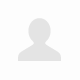
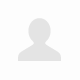

In [55]:
get('https://mail.naver.com', cookies=naverCookie).text

In [81]:
url = 'https://mail.naver.com/json/list/'

In [78]:
mailParams = {}
for _ in 'page=1&sortField=1&sortType=0&folderSN=0&type=&isUnread=false&u=wheeboo'.split('&'):
    mailParams[_.split('=')[0]] = _.split('=')[1]
    
# '&'로 쪼개

In [85]:
mailParams

{'page': '1',
 'sortField': '1',
 'sortType': '0',
 'folderSN': '0',
 'type': '',
 'isUnread': 'false',
 'u': 'wheeboo'}

cookie 직접 이용 방식

In [89]:
from requests.compat import urlencode
resp = post(url, data=mailParams, cookies=naverCookie)
resp.json()

{'currentTime': 1657250686,
 'lastPage': 39,
 'Message': '',
 'pageSize': 80,
 'unreadCount': 1682,
 'mailData': [{'mailSN': 24694,
   'folderSN': 0,
   'folderName': None,
   'iconType': 0,
   'status': 2097157,
   'from': {'name': '고려대학교 지능정보SW아카데미', 'email': 'iniswacademy@gmail.com'},
   'subject': '[고려대학교 지능정보SW아카데미] 10조 멘토링 신청 확정 (10조 멘토링)',
   'receivedTime': 1657233527,
   'sentTime': 1657233523,
   'size': 5521,
   'attachCount': 0,
   'iDomainEmail': 'wheeboo@naver.com',
   'priority': 3,
   'securityLevel': None,
   'reSend': False,
   'color': '#ffffff',
   'preview': '',
   'mimeSN': '1657233527.809756.54774.63232',
   'toList': [{'name': '', 'email': 'bchaeeun9@naver.com'}],
   'spamType': None,
   'attachInfo': [],
   'threadId': '<165723352249.5172.13859036187135874272@v118-27-37-152.0jtl.static.cnode.io>',
   'bccList': [],
   'receiveByBcc': False,
   'threadCount': 0,
   'unreadThreadCount': 0,
   'firstLocatedTime': 1657233527,
   'remindAt': 0,
   'threadRemindAt': 

In [90]:
for _ in resp.json()['mailData']:
    print('{} | {} | {}'.format(_['from']['name'],
                               _['subject'],
                               _['receivedTime']))

고려대학교 지능정보SW아카데미 | [고려대학교 지능정보SW아카데미] 10조 멘토링 신청 확정 (10조 멘토링) | 1657233527
고려대학교 지능정보SW아카데미 | [고려대학교 지능정보SW아카데미] 10조 멘토링 신청 (10조 멘토링) | 1657206428
고려대학교 지능정보SW아카데미 | [고려대학교 지능정보SW아카데미] 10조 멘토링 신청 변경 (10조 아이디어 컨펌) | 1657204752
고려대학교 지능정보SW아카데미 | [고려대학교 지능정보SW아카데미] 10조 멘토링 신청 변경 (10조 아이디어 컨펌) | 1657204749
고려대학교 지능정보SW아카데미 | [고려대학교 지능정보SW아카데미] 10조 멘토링 변경 요청 (10조 아이디어 컨펌) | 1657193990
고려대학교 지능정보SW아카데미 | [고려대학교 지능정보SW아카데미] 10조 멘토링 신청 (10조 아이디어 컨펌) | 1657188191
OPIc(오픽) | OPIc개인정보 이용내역 통지 안내 | 1657173576
김박사넷 플러스 | 🇺🇸 명문 대학원 합격 꿀팁🍯 | 1657166406
공공데이터포털 | [ 공공데이터포털 ] 회원가입 이메일 인증번호 | 1657164194
최수근 | 안녕하세요. 데이터 청년 캠퍼스 운영 담당자입니다.  | 1657162839
네이버페이 | 네이버페이 충전포인트 인출 완료 | 1657117736
나이키닷컴 | [나이키] 개인 정보 국외 이전 및 제 3자 제공 동의 요청 | 1657087407
NICE평가정보 | [NICE지키미] 이*은님, 이번 달 신용정보 안심제공 내역을 확인하세요! | 1657063596
Twitter | iPhone에 9.15.2에서 트위터에 새로 로그인했습니다 | 1657043654
CodeGround | [Codeground] 개인정보 이용내역 안내 | 1657033569
네이버 | 알림 없이 로그인하는 기기로 등록 되었습니다. | 1656998625
네이버 | 새로운 기기에서 로그인 되었습니다. | 1656998624
Bitbu

In [69]:
resp.text

'{"Result":"FAIL","Message":"", "LoginStatus":"NOLOGIN"}'

In [94]:
mailCookie = {_.split('=')[0]:_.split('=')[1]
 for _ in re.split('[; ]{2}','NID_SES=AAABs/L12Sc7YEgRpzskVb2H1qg8Gs0aAdr7GA0LDwOYlJ/8scplEZBNghN5IglKsRQfT679nr1kFa4ZwZpBFG5yMWePLWhXjrnCqH3vfbVmGEtKl/KCTE5MvWMIAtq9mkM0wERATsX7Rm6E/JDO1BBWGCCq6xXc61rHjm3pu0H1DEUDIeP8OHLJLoJjFrDubx7q/XQ0engUvHonkfuFAC9nWUS6DTZ/jiQMh0vMWa3+A2rZ2KkjgeBq3kevHRahVjAYxzGyJBPaoID8YZVQ/fd/dfy2fyh4b6WuWyIuRZFkJkhpLseburH678YUBsEkt0OW/XL/cNy2E2OXkgG4WUSedUZa3M6sSI0lRV44jbFr5gIGM+hylerNXCNXllaMQUTaYhmxGEuthdpkQvYjexG6XWK3SnZge4/z/nJ1SdCfohrUtfVNjjO4+abpmgC/DPfm2pB0ZGGNfFpsH6Y9jk2O5PlH9ksS6la1lHXC48Ocl733T5we/PA4bh0p2i8IqZlNeYlQckaNpnkwLMSCtQ/JOAP++J8rzJ3cRame0UmYsoz4yC7SJPnU1/Lq2BDOJI6D7/iIkmRg4Nkz6b6lHOrR9aI=; path=/; domain=.naver.com')}

In [71]:
get('https://mail.naver.com', cookies=mailCookie).text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no">\n    <meta property="og:type" content="website">\n    <meta property="og:title" content="[네이버: 로그인]">\n    <meta property="og:description" content="안전한 로그인을 위해 주소창의 URL과 자물쇠 마크를 확인하세요!">\n    <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png">\n    <meta property="og:image:type" content="image/png">\n    <meta property="og:image:width" content="1200">\n    <meta property="og:image:height" content="1200">\n    <title>네이버 : 로그인</title>\n    <link rel="stylesheet" type="text/css" href="/login/css/global/desktop/w_20220216.css?20210812">\n</head>\n<body>\n<div id="wrap" class="wrap">\n    <div class="u_skip"><a href="https://www.naver.com">본문 바로가기</a></div>\n    <header class="header" role="banner" >\

망했으니까 세션 방식으로 다시

In [72]:
session.cookies.clear()

'\n\n\n<!DOCTYPE HTML>\n\n\t\n\t\n\t\n\t\n\t\n\t\t<html lang="ko">\n\t\n\n\n<head>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\t\n\t\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail2_le.min.220427.css">\n\t\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_skin.min.220427.css">\n\t\t\t\t\n\t\t\t\t\n\t\t\t\n\t\t\n\t\n\t\n\t\t\n\t\t\n\t\t\t\t<link rel="dns-prefetch" href="//ssl.pstatic.net" />\n\t\t\t\t<link rel="dns-prefetch" href="//lcs.naver.com" />\n\t\t\t\t<link rel="dns-prefetch" href="//cc.naver.com" />\n\t\t\t\t<link rel="dns-prefetch" href="//static.nid.naver.com" />\n\t\t\t\t<link rel="dns-prefetch" href="//phinf.pstatic.net" />\n\t\t\t\t<link rel="stylesheet" type="text/css" href="/css/mail_me.min.220427.css">\n\t\t\n\t\n\t<link rel="shortcut icon" href="/favicon.ico?2">\n\t\n\t\n\t\t\n\t\n\t<title>네이버 메일</title>\n\t<script type="text/jav
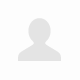
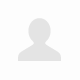

In [100]:
get('https://mail.naver.com', cookies=naverCookie).text

session 이용 방식

In [97]:
resp = session.post('https://mail.naver.com/json/list/', data=mailParams)

In [98]:
resp

<Response [200]>

In [75]:
for k,v in mailCookie.items():
    session.cookies.set(k,v)

In [ ]:
for k,v in session.cookies.get_dict():
    

Cookie <- 서버 클라이언트 생성
cookie 수동   / Session() 자동
cookie => dict

response.header.cookie

INSTAGRAM 실습

토큰값을 가지고 있음 : response -> set-cookie -> x-csrftoken 확인

In [ ]:
#PWD_INSTAGRAM_BROWSER:


In [ ]:
{PLAINTEXT:'0', ROTATED_ENCRYPT:'6',FALLBACK_ENCRYPT:'9'}

text/plain
text/html | xml | application | x- | json | image/* | multimedia | 

In [241]:
resp = get('https://www.instagram.com')
# 쿠키 생성
instagramCookie = {k:v for k,v in  resp.cookies.get_dict().items()}

In [242]:
# 암호화를 뛰어넘어 접속할 수 있는 방법 찾기 (Plaintext이용)
# ajax의 payload 데이터 추출
url = 'https://www.instagram.com/accounts/login/ajax/'
data = {unquote(_.split('=')[0]):unquote(_.split('=')[1])
        for _ in 'enc_password=#PWD_INSTAGRAM_BROWSER:10:1657259000:ASxQAE+3Y//QkftqwtSSyt08Ioj+tMigfQXTfnkQiLiOfC5p5D8eKzKC7dASqXwUQJKsvFUK1YwDVu7FSA2k4v5m2yh6I+sECBOtVLqZdrp07/WJuyuiarfDAhDXRaO6XERLOeqcJOhp/lqcVoM='.split('&')}

In [243]:
data

{'enc_password': '#PWD_INSTAGRAM_BROWSER:10:1657259000:ASxQAE+3Y//QkftqwtSSyt08Ioj+tMigfQXTfnkQiLiOfC5p5D8eKzKC7dASqXwUQJKsvFUK1YwDVu7FSA2k4v5m2yh6I+sECBOtVLqZdrp07/WJuyuiarfDAhDXRaO6XERLOeqcJOhp/lqcVoM'}

In [244]:
%%writefile insta_account.json
{"id":"dldwjddmd@gmail.com", "pw": "2Wjddmd!!"}

Overwriting insta_account.json


여기서부터 오류

In [245]:
%pwd

'C:\\Users\\wheeb\\Documents\\2022-하계방학'

In [246]:
with open('insta_account.json', encoding='utf8') as f:
    instaAccount = json.load(f)

In [247]:
data['username'] = instaAccount["id"]

In [248]:
data['enc_password'] = '{}:{}:{}:{}'.format('#PWD_INSTAGRAM_BROWSER', 0,
                                           int(datetime.now().timestamp()), instaAccount["pw"])

In [249]:
from requests.compat import unquote
unquote(data['enc_password'])

'#PWD_INSTAGRAM_BROWSER:0:1657262964:2Wjddmd!!'

In [250]:
from datetime import datetime
datetime.now()

datetime.datetime(2022, 7, 8, 15, 49, 25, 181090)

In [251]:
data['enc_password']

'#PWD_INSTAGRAM_BROWSER:0:1657262964:2Wjddmd!!'

In [252]:
instagramCookie['csrftoken']

'Dt33f53zIyZIJIApHz3VDJd0p34aVo5G'

In [253]:
url = 'https://www.instagram.com/accounts/login/ajax/'
header = {
    'referer' : 'https://www.instagram.com/',
    'x-csrftoken' : instagramCookie['csrftoken'],
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
}
resp = post(url, data=data, headers = header, cookies = instagramCookie)

In [254]:
for k,v in resp.cookies.items():
    if k not in instagramCookie:
        instagramCookie[k] = v

In [255]:
instagramCookie

{'csrftoken': 'Dt33f53zIyZIJIApHz3VDJd0p34aVo5G',
 'ig_did': '499A88D0-B68B-4657-8C24-699F571F2875',
 'ig_nrcb': '1',
 'mid': 'YsfTZQAEAAHh8_z3UtZbg5bGiLqC',
 'ds_user_id': '54078877837',
 'rur': 'PRN',
 'sessionid': '54078877837%3AW1U1S9WB1K2WnI%3A19%3AAYdG__JTs70VCx9MP4OpKFYyFVHkBAZKhDMwGyE4_g'}

In [256]:
resp.text

'{"user":true,"userId":"54078877837","authenticated":true,"oneTapPrompt":true,"status":"ok"}'

In [257]:
resp.cookies

<RequestsCookieJar[Cookie(version=0, name='csrftoken', value='Ipk2O2z4Nr4VjbqTYPlLXIY1VrKvJVTt', port=None, port_specified=False, domain='.instagram.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1688712569, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='ds_user_id', value='54078877837', port=None, port_specified=False, domain='.instagram.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1665038969, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='rur', value='PRN', port=None, port_specified=False, domain='.instagram.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False), Cookie(version=0, name='sessionid', value='54078877837%3AW1U1S9WB1K

In [258]:
url = 'https://i.instagram.com/api/v1/tags/web_info/'
params = {'tag_name':'한지민'}
resp = get(url, params=params, cookies = instagramCookie,
          headers=header)

In [259]:
resp.status_code

400

In [235]:
#최근 이미지 계정별 1개 가져오기 - 첫 페이지
for _ in resp.json()['data']['recent']['sections']:  #목록(row)
    print(_['layout_content']['medias'][0]  # 목록(column)
          ['media']['carousel_media'][0]   # 대표 이미지
          ['image_version2']['candidates'][0]['url'])  #해상도 제일 높은 것

KeyError: 'data'

In [212]:
header

{'referer': 'https://www.instagram.com/',
 'x-csrftoken': 'Z2pYZBIStBTYNYACWHwUlceqjfzn5mcO',
 'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

In [215]:
header['x-asbd-id'] = '198387'
header['x-ig-app-id'] = '936619743392459'

In [216]:
header

{'referer': 'https://www.instagram.com/',
 'x-csrftoken': 'Z2pYZBIStBTYNYACWHwUlceqjfzn5mcO',
 'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
 'x-asbd-id': '198387',
 'x-ig-app-id': '936619743392459'}

### Tokenizing
- 언어 모델 만들기

In [1]:
def ngram(source, N=2):
    tokens = list()
    for i in range(len(source)-N+1):
        tokens.append(source[i:i+N])
    return tokens

ngram('아버지가')

['아버', '버지', '지가']

In [3]:
def ngrams(source, N=2):
    source = source.split()
    tokens = list()
    for i in range(len(source)-N+1):
        tokens.append(source[i:i+N])
    return tokens

ngrams('아버지가 방에 들어가신다')

[['아버지가', '방에'], ['방에', '들어가신다']]

In [12]:
data

NameError: name 'data' is not defined

In [13]:
unigram = ngram(data, 1)
bigram = ngram(data)

NameError: name 'data' is not defined

In [ ]:
#len(unigram), len(set(unigram)), unigram[0]
findUnigram = lambda x:len(list(
    _ for _ in filter(lambda _:_ == x, unigram)))
findBigram = lambda x:len(list(
    _ for _ in filter(lambda _:_ == x, bigram)))

In [ ]:
findUnigram('윤')/ len(unigram)

In [ ]:
for x in [_ for _ in set(bigram) if _.startswith('석')]:
    prob = findBigram(x)/findUnigram('석')
    print(x, prob)

## 07/18 (월)

- Feature extraction : 잘개 쪼개
- Feature selection : 의미 있는 단어 추출

WordPM(Sentence Piece Model) : 통계적 -> BPE(언어적X, 통계정보O)

불용어 제거, Normalization(대소문자, '', 약어-도시, 이름, 고유명사, 기호)

1억 -> 1천 만개 -> 나례비(Top:100) -> 100

중요한 정도(Zipf's Law -> TF-IDF, Rochhio, BM25...)  => 문서/단어/검색

TF-IDF : 중요도를 찾아 알려줌

In [28]:
corpus = {
    'low' : 5,
    'lower' : 2,
    'newest' : 6,
    'widest' : 3
}

corpus = {
    '우영우가' : 5,
    '우영우에게' : 2,
    '우영우를' : 6,
    '우영우는' : 3
}

def preprocessing(src):  # tokenization
    data = dict()
    for token, freq in src.items():
        data[' '.join(['<w>']+list(token)+['</w>'])] = freq  # ~로 시작하고 ~로 끝나는
        
    return data



# bigram을 이용해 쪼갠 후 merge


def findPair(src, N=2):
    data = dict()
    for row, freq in src.items():
        tokens = row.split()
        for i in range(len(tokens)-N+1):
            pair = tuple(tokens[i:i+N])  # 나중에 hash화 해야 하므로 tuple로 저장
            
            if pair not in data:
                data[pair] = freq
            else:
                data[pair] += freq
    return data

def mergePair(src, key):
    data = dict()
    for row, freq in src.items():
        newRow = re.sub(r'{}'.format(' '.join(key)),
                                    ''.join(key), row) # 따로 적혀 있으니 붙여주는 것으로 대체
        data[newRow] = freq
    return data

data = preprocessing(corpus)
for _ in range(3):
    pair = findPair(data)
    key = max(pair, key=pair.get)
    data = mergePair(data, key)

In [29]:
subwordPattern = [_ for row in data.keys()
    for _ in row.split()
     if len(re.sub(r'[<].+?[>]', '', _)) > 2 and\
         re.search(r'^[<].+[>]$', _) is None]  # 원래 조건에서 세 글자 이상이고 태그 표현이 아닌 경우

In [30]:
term = list()

for token in corpus.keys():
    for _ in subwordPattern:
        
        # 실제 토큰(단어의 시작점 - 접두 없을 때 어간 찾기)
        if re.search(r'^<w>', _):
            p = re.sub(r'<w>', '', _)
            result = re.search(r'\b({})'.format(p), token)
            if result and result.groups(1)[0] not in term:
                term.append(result.groups(1)[0])
                
        # 스테밍(버려야 하는- 접미 없을 때 어간 찾기)
        elif re.search(r'</w>$', _):
            p = re.sub(r'</w>', '', _)
            result = re.search(r'(.+?){}\b'.format(p), token)
            if result and result.groups(1)[0] not in term:
                term.append(result.groups(1)[0])
                
        # 실제 토큰 (접두/접미 없을 때 어간 찾기)
        else:
            result = re.search(r'{}'.format(_), token)
            if result and result.groups(1)[0] not in term:
                term.append(result.groups(1)[0])
' '.join(term), ' '.join(corpus.keys())

('우영우', '우영우가 우영우에게 우영우를 우영우는')

< w >, < /w > => x

< w >글자 => \b글자

In [6]:
pair

{('<w>', 'l'): 7,
 ('l', 'o'): 7,
 ('o', 'w'): 7,
 ('w', '</w>'): 5,
 ('w', 'e'): 8,
 ('e', 'r'): 2,
 ('r', '</w>'): 2,
 ('<w>', 'n'): 6,
 ('n', 'e'): 6,
 ('e', 'w'): 6,
 ('e', 's'): 9,
 ('s', 't'): 9,
 ('t', '</w>'): 9,
 ('<w>', 'w'): 3,
 ('w', 'i'): 3,
 ('i', 'd'): 3,
 ('d', 'e'): 3}

In [7]:
import re

#### 실습

In [47]:
from string import punctuation

corpora = '''
애플이 플래그쉽 스마트폰 가격과 맞먹는 새 스마트워치 라인업을 선보일 것이라는 전망이 나왔다.

블룸버그 통신에 따르면 애플은 오는 9월 애플워치 8시리즈와 함께 더 큰 화면과 내구성을 키운 '러기드 스마트워치'를 선보인다. 코드명 N199로 알려진 신형 애플워치는 익스트림 스포츠를 즐기는 운동선수와 고가의 가민(Garmin) 스포츠용 스마트워치를 구매하는 사용자 등에게 적합할 것으로 보인다.

모델명 후보로는 '애플워치 프로'가 유력하게 점쳐진다. 이외에도 '애플워치 익스트림', '애플워치 맥스', '애플워치 익스플로러 에디션' 등도 거론되고 있다.

신형 애플워치는 러기지 제품군 답게 외부는 티타늄 같은 강도 높은 금속 소재를 사용할 것으로 보인다. 또 두툼한 배터리를 탑재해 긴 사용시간을 보장할 전망이다.

디스플레이는 2인치로 케이스 크기는 46㎜ 또는 47㎜로 추정된다. 이는 화면이 45㎜ 애플워치7보다 0.099인치 가량 커진 셈이다. 기존 제품에는 탑재되지 않은 체온 센서도 추가될 가능성이 제기됐다. 또한 와이파이 단독 모델 대신 셀룰러 통합 모델만 출시할 확률이 높다.

다만 신형 애플워치의 출고가는 아이폰 프로 모델에 맞먹을 전망이다. 블룸버그 통신은 "신형 애플워치는 다른 애플 제품과 마찬가지로 프로 모델인 이상 출고가가 기존 제품보다 더 높아질 것”이라며 최고 999달러(약 130만원)를 예상 가격으로 제시했다. 이는 아이폰13 프로의 시작 가격인 135만원과 비슷한 수준이다. 현재 판매중인 애플워치7시리즈 티타늄 케이스 모델의 시작가인 99만9000원보다는 30만원 가량 비싸다.

한편 삼성전자는 다음달 갤럭시워치5를 출시할 것으로 전망된다. 특히 이번 갤럭시워치 신제품에 체온 측정 기능을 지원할지 관심이 쏠리고 있다. 미국 정보기술(IT) 전문매체 폰아레나 등 외신은 지난 3월부터 갤럭시워치5에 체온 감지 센서가 내장될 것이라고 전한 바 있다.

'''

corpora = re.sub(r'{''"".,()]', '', corpora.strip())

corpus = dict()
for _ in corpora.split():
    if _ not in corpus:
        corpus[_] = 1
    else:
        corpus[_] += 1

data = preprocessing(corpus)
for _ in range(100):
    pair = findPair(data)
    key = max(pair, key=pair.get)
    data = mergePair(data, key)



subwordPattern = [_ for row in data.keys()
                for _ in row.split()
                if len(re.sub(r'[<].+?[>]', '', _)) > 2 and\
                    re.search(r'^[<].+[>]$', _) is None]  # 원래 조건에서 세 글자 이상이고 태그 표현이 아닌 경우


term = list()

for token in corpus.keys():
    for _ in subwordPattern:
        
        # 실제 토큰(단어의 시작점 - 접두 없을 때 어간 찾기)
        if re.search(r'^<w>', _):
            p = re.sub(r'<w>', '', _)
            result = re.search(r'\b({})'.format(p), token)
            if result and result.groups(1)[0] not in term:
                term.append(result.groups(1)[0])
                
        # 스테밍(버려야 하는- 접미 없을 때 어간 찾기)
        elif re.search(r'</w>$', _):
            p = re.sub(r'</w>', '', _)
            result = re.search(r'(.+?){}\b'.format(p), token)
            if result and result.groups(1)[0] not in term:
                term.append(result.groups(1)[0])
                
        # 실제 토큰 (접두/접미 없을 때 어간 찾기)
        else:
            result = re.search(r'({})'.format(_), token)
            if result and result.groups(1)[0] not in term:
                term.append(result.groups(1)[0])
' '.join(term)

'스마트 스마트워치 것이라 애플워치 시리즈 익스트림 갤럭시워치'

In [42]:



corpus

{'애플이': 1,
 '플래그쉽': 1,
 '스마트폰': 1,
 '가격과': 1,
 '맞먹는': 1,
 '새': 1,
 '스마트워치': 1,
 '라인업을': 1,
 '선보일': 1,
 '것이라는': 1,
 '전망이': 1,
 '나왔다.': 1,
 '블룸버그': 2,
 '통신에': 1,
 '따르면': 1,
 '애플은': 1,
 '오는': 1,
 '9월': 1,
 '애플워치': 1,
 '8시리즈와': 1,
 '함께': 1,
 '더': 2,
 '큰': 1,
 '화면과': 1,
 '내구성을': 1,
 '키운': 1,
 "'러기드": 1,
 "스마트워치'를": 1,
 '선보인다.': 1,
 '코드명': 1,
 'N199로': 1,
 '알려진': 1,
 '신형': 3,
 '애플워치는': 3,
 '익스트림': 1,
 '스포츠를': 1,
 '즐기는': 1,
 '운동선수와': 1,
 '고가의': 1,
 '가민(Garmin)': 1,
 '스포츠용': 1,
 '스마트워치를': 1,
 '구매하는': 1,
 '사용자': 1,
 '등에게': 1,
 '적합할': 1,
 '것으로': 3,
 '보인다.': 2,
 '모델명': 1,
 '후보로는': 1,
 "'애플워치": 4,
 "프로'가": 1,
 '유력하게': 1,
 '점쳐진다.': 1,
 '이외에도': 1,
 "익스트림',": 1,
 "맥스',": 1,
 '익스플로러': 1,
 "에디션'": 1,
 '등도': 1,
 '거론되고': 1,
 '있다.': 3,
 '러기지': 1,
 '제품군': 1,
 '답게': 1,
 '외부는': 1,
 '티타늄': 2,
 '같은': 1,
 '강도': 1,
 '높은': 1,
 '금속': 1,
 '소재를': 1,
 '사용할': 1,
 '또': 1,
 '두툼한': 1,
 '배터리를': 1,
 '탑재해': 1,
 '긴': 1,
 '사용시간을': 1,
 '보장할': 1,
 '전망이다.': 2,
 '디스플레이는': 1,
 '2인치로': 1,
 '케이스': 2,
 '크기는': 1,
 '46㎜': 1,
 '또는': 1,


In [44]:
def preprocessing(src):  # tokenization
    data = dict()
    for token, freq in src.items():
        data[' '.join(['<w>']+list(token)+['</w>'])] = freq  # ~로 시작하고 ~로 끝나는
        
    return data


# bigram을 이용해 쪼갠 후 merge


def findPair(src, N=2):
    data = dict()
    for row, freq in src.items():
        tokens = row.split()
        for i in range(len(tokens)-N+1):
            pair = tuple(tokens[i:i+N])  # 나중에 hash화 해야 하므로 tuple로 저장
            
            if pair not in data:
                data[pair] = freq
            else:
                data[pair] += freq
    return data

def mergePair(src, key):
    data = dict()
    for row, freq in src.items():
        newRow = re.sub(r'{}'.format(' '.join(key)),
                                    ''.join(key), row) # 따로 적혀 있으니 붙여주는 것으로 대체
        data[newRow] = freq
    return data

data = preprocessing(corpus)
for _ in range(100):
    pair = findPair(data)
    key = max(pair, key=pair.get)
    data = mergePair(data, key)



subwordPattern = [_ for row in data.keys()
    for _ in row.split()
     if len(re.sub(r'[<].+?[>]', '', _)) > 2 and\
         re.search(r'^[<].+[>]$', _) is None]  # 원래 조건에서 세 글자 이상이고 태그 표현이 아닌 경우


term = list()

for token in corpus.keys():
    for _ in subwordPattern:
        
        # 실제 토큰(단어의 시작점 - 접두 없을 때 어간 찾기)
        if re.search(r'^<w>', _):
            p = re.sub(r'<w>', '', _)
            result = re.search(r'\b({})'.format(p), token)
            if result and result.groups(1)[0] not in term:
                term.append(result.groups(1)[0])
                
        # 스테밍(버려야 하는- 접미 없을 때 어간 찾기)
        elif re.search(r'</w>$', _):
            p = re.sub(r'</w>', '', _)
            result = re.search(r'(.+?){}\b'.format(p), token)
            if result and result.groups(1)[0] not in term:
                term.append(result.groups(1)[0])
                
        # 실제 토큰 (접두/접미 없을 때 어간 찾기)
        else:
            result = re.search(r'{}'.format(_), token)
            if result and result.groups(1)[0] not in term:
                term.append(result.groups(1)[0])
' '.join(term)

IndexError: tuple index out of range

#### Stopwords

In [50]:
stopwords = ['은','는','이','가','에게','께서']
text = '어머니 는 짜장면 이'
' '.join([_ for _ in text.split() if _ not in stopwords])

'어머니 짜장면'

In [59]:
stopwords = ['바보', '바1보', '바!보', '바@#$^@#%$보', '바보놈']
text = '너는 바!보 야!'
result = []

for _ in text.split():
    if _ in stopwords:
        result.append('*'*len(_))
    else:
        result.append(_)
        
' '.join(result)

'너는 *** 야!'

In [60]:
text = '너는 바@#$%^보 바보놈 야!'
' '.join(result)

'너는 *** 야!'

In [61]:
for _ in stopwords:
    print(re.sub(r'\b(바.+보.+?)\b', '*'*len(_), text))

너는 ** 야!
너는 *** 야!
너는 *** 야!
너는 ********** 야!
너는 *** 야!


### String metric

Hamming Distance - 비교

In [ ]:
org = '이상한 변호사 우영우'  # 글자 길이가 똑같아야 한다는 단점
src = '이상한 변호사 우병우'

count = 0
for o, s in zip(org, src):
    if o != s:
        count += 1
count/len(org) # => (Maximum)Likelihood(Estimation) MLE 추정

Levenshtein Distance(Edit Distance)

In [76]:
def leven(a, b):
    edit_distance = [[0 for _ in range(len(b)+1)]
                    for _ in range(len(a)+1)]
    
    for i in range(len(a)+1):
        edit_distance[0][i] = i
        
    for j in range(len(b)+1):
        edit_distance[j][0] = j
        
    if len(b) ==0:
        return len(a)
    
    if len(a) ==0:
        return len(b)
    
    for i, ch_a in enumerate(a):
        cur_i = i+1
        prv_i = i
        
        for j, ch_b in enumerate(b):
            cur_j = j+1
            prv_j = j
            
            insert_op = 1+edit_distance[prv_i][cur_j]
            delete_op = 1+edit_distance[i][prv_j]
            modify_op = edit_distance[prv_i][prv_j] + (0 if ch_a == ch_b else 1) # 비교하는 부분 핵심
            
            edit_distance[cur_i][cur_j] =\
                          min([insert_op, delete_op, modify_op])
            
            
            #if ch_a == ch_b:
            #    edit_distancep[prv_i][cur_j] = 0
            #else:
                
        
    return edit_distance

# leven('이상한 변호사 우영우', '이상한 변호사 우병우')
#leven('이상한 변호사 우영우', '이상한 변호사 우병우')
leven('Levenshtein', 'Levenshtein')

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [1, 0, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5],
 [2, 1, 0, 2.0, 2.5, 4.0, 5.0, 6.0, 7.0, 7.5, 9.0, 10.0],
 [3, 2, 1, 0, 2.5, 3.0, 4.5, 5.5, 6.5, 7.5, 8.0, 9.5],
 [4, 3, 2, 1, 0, 3.0, 3.5, 5.0, 6.0, 6.5, 8.0, 8.5],
 [5, 4, 3, 2, 1, 0, 3.5, 4.0, 5.5, 6.5, 7.0, 8.0],
 [6, 5, 4, 3, 2, 1, 0, 4.0, 4.5, 6.0, 7.0, 7.5],
 [7, 6, 5, 4, 3, 2, 1, 0, 4.5, 5.0, 6.5, 7.5],
 [8, 7, 6, 5, 4, 3, 2, 1, 0, 5.0, 5.5, 7.0],
 [9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 5.5, 6.0],
 [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 6.0],
 [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]]

In [77]:
ord('가'), ord('힣')  # ord() : unicode point 반환

(44032, 55203)

In [78]:
ord('나'), ord('나')-ord('가')

(45208, 1176)

In [79]:
ord('가'), ord('갛'), ord('갛')-ord('가')

(44032, 44059, 27)

In [81]:
# 초성-19 / 중성-21 / 종성-28


choList = ['ㄱ','ㄲ','ㄴ','ㄷ','ㄸ','ㄹ',]

jungList = ['ㅏ','ㅐ','ㅑ','ㅒ','ㅓ','ㅔ',]

jongList = [' ', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ','ㄵ','ㄶ','ㄷ','ㄹ','ㄺ','ㄻ','ㄼ','ㄽ','ㄾ','ㄿ','ㅀ',
            'ㅁ','ㅂ','ㅄ','ㅅ','ㅆ','ㅇ','ㅈ','ㅊ','ㅋ','ㅌ','ㅍ','ㅎ']

def uni2tri(src):
    base = ord('가')
    result = list()
    
    for _ in range(len(src)):
        if re.match('[가-힣]'):
            cho, jungjong = divmod(ord(src[_])-base, / (21*28))
            jung, jong = divmod(jungjong, 28)
            result.append(choList[cho])

'따'

In [ ]:
chr(base+21*28*4)

In [80]:
''.join([chr(ord('가')+(_*28)) for _ in range(42)])

'가개갸걔거게겨계고과괘괴교구궈궤귀규그긔기까깨꺄꺠꺼께껴꼐꼬꽈꽤꾀꾜꾸꿔꿰뀌뀨끄끠끼'

In [82]:
len({" ","ㄱ","ㄲ","ㄳ","ㄴ","ㄵ","ㄶ","ㄷ","ㄹ","ㄺ","ㄻ","ㄼ","ㄽ","ㄾ","ㄿ","ㅀ","ㅁ","ㅂ","ㅄ","ㅅ","ㅆ","ㅇ","ㅈ","ㅊ","ㅋ","ㅌ","ㅍ","ㅎ"})


28

In [83]:
len(' ')

1

In [84]:
len(['' ","ㄱ","ㄲ","ㄳ","ㄴ","ㄵ","ㄶ","ㄷ","ㄹ","ㄺ","ㄻ","ㄼ","ㄽ","ㄾ","ㄿ","ㅀ","ㅁ","ㅂ","ㅄ","ㅅ","ㅆ","ㅇ","ㅈ","ㅊ","ㅋ","ㅌ","ㅍ","ㅎ"])


28

In [85]:
len([' ', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ','ㄵ','ㄶ','ㄷ','ㄹ','ㄺ','ㄻ','ㄼ','ㄽ','ㄾ','ㄿ','ㅀ','ㅁ','ㅂ','ㅄ','ㅅ','ㅆ','ㅇ','ㅈ','ㅊ','ㅋ','ㅌ','ㅍ','ㅎ'])

28

### TF-IDF

TF-IDF, MI, PMI, Corre, Chi, ...

Weighting, Search Algorithm

TF(Term Freq): 빈번하게 나온 애한테 더 많은 가중치

                Stopwords 가중치 높음, Rare 가중치 낮음=0
                
                
IDF(Invert Doc Freq): 드물게 나온 대한테 더 많은 가중치

                       Rare 가중치 높음, 고빈도 가중치 낮음=0

In [ ]:
*
 *
   *
      *
          *
                * 
                              *       *
------                      -----------
  TF              X              IDF
           most significant = Feature
TM = TEXT 데이터의 일부(AI/ML/통계)
NLP = TEXT 말의 흐름/ 원리를 설명하는 자료

In [96]:
from math import log2
tf = lambda freq, maxfreq, K=0.5:K+(1-K)*(freq/maxfreq)
idf = lambda docfreq, N:log2(N/(docfreq+1))

In [97]:
corpus = '''
애플이 플래그쉽 스마트폰 가격과 맞먹는 새 스마트워치 라인업을 선보일 것이라는 전망이 나왔다.

블룸버그 통신에 따르면 애플은 오는 9월 애플워치 8시리즈와 함께 더 큰 화면과 내구성을 키운 '러기드 스마트워치'를 선보인다. 코드명 N199로 알려진 신형 애플워치는 익스트림 스포츠를 즐기는 운동선수와 고가의 가민(Garmin) 스포츠용 스마트워치를 구매하는 사용자 등에게 적합할 것으로 보인다.

모델명 후보로는 '애플워치 프로'가 유력하게 점쳐진다. 이외에도 '애플워치 익스트림', '애플워치 맥스', '애플워치 익스플로러 에디션' 등도 거론되고 있다.

신형 애플워치는 러기지 제품군 답게 외부는 티타늄 같은 강도 높은 금속 소재를 사용할 것으로 보인다. 또 두툼한 배터리를 탑재해 긴 사용시간을 보장할 전망이다.

디스플레이는 2인치로 케이스 크기는 46㎜ 또는 47㎜로 추정된다. 이는 화면이 45㎜ 애플워치7보다 0.099인치 가량 커진 셈이다. 기존 제품에는 탑재되지 않은 체온 센서도 추가될 가능성이 제기됐다. 또한 와이파이 단독 모델 대신 셀룰러 통합 모델만 출시할 확률이 높다.

다만 신형 애플워치의 출고가는 아이폰 프로 모델에 맞먹을 전망이다. 블룸버그 통신은 "신형 애플워치는 다른 애플 제품과 마찬가지로 프로 모델인 이상 출고가가 기존 제품보다 더 높아질 것”이라며 최고 999달러(약 130만원)를 예상 가격으로 제시했다. 이는 아이폰13 프로의 시작 가격인 135만원과 비슷한 수준이다. 현재 판매중인 애플워치7시리즈 티타늄 케이스 모델의 시작가인 99만9000원보다는 30만원 가량 비싸다.

한편 삼성전자는 다음달 갤럭시워치5를 출시할 것으로 전망된다. 특히 이번 갤럭시워치 신제품에 체온 측정 기능을 지원할지 관심이 쏠리고 있다. 미국 정보기술(IT) 전문매체 폰아레나 등 외신은 지난 3월부터 갤럭시워치5에 체온 감지 센서가 내장될 것이라고 전한 바 있다.
'''

data = [_ for _ in corpus.splitlines() if len(_) > 1]
bigram = lambda src:[src[i:i+2] for i in range(len(src)-1)]

In [98]:
TDM = dict()
MAXFREQ = [0 for _ in range(len(data))]

for i, d in enumerate(data):
    for t in bigram(d):
        if t not in TDM.keys():
            TDM[t] = dict()
            TDM[t][i] = 1
            
        else:
            if i not in TDM[t]:
                TDM[t][i] = 1
            else :
                TDM[t][i] += 1
        if TDM[t][i] > MAXFREQ[i]:
            MAXFREQ[i] = TDM[t][i]

In [99]:
TFIDF = dict()
N = len(data)

for t, dl in TDM.items():
    df = len(dl)
    
    TFIDF[t] = dict()
    for i, f in dl.items():
        TFIDF[t][i] = tf(f, MAXFREQ[i]) * idf(df, N)

In [100]:
result = list([] for _ in range(len(data)))

for t, wl in TFIDF.items():
    for i, w in wl.items():
        result[i].append((t,w))

In [103]:
for i in range(len(data)):
    print([_[0] for _ in sorted(result[i], key=lambda _:_[1], reverse=True)[:5]])

['플이', ' 플', '플래', '래그', '그쉽']
['와 ', '스포', '포츠', ' 스', '신에']
["'애", "',", ', ', " '", '델명']
[' 러', '기지', '품군', '군 ', ' 답']
[' 4', '인치', '㎜ ', ' 추', '디스']
['인 ', '13', '만원', '출고', ' 아']
[' 갤', '갤럭', '럭시', '시워', '치5']


In [ ]:
r